# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

В проекте мы подробно изучим архив объявлений, избавимся от пропусков в данных, от аномалий. Увидим, сколько в среднем комнат в квартире, на каких этажах они находятся, далеко ли от центра, сколько рядом парков и водоемов и еще много другого. Рассмотрим что влияет на цену квартир (площадь, количетсво комнат или день публикации).

###  1 Изучение общей информации

In [37]:
import pandas as pd
import os

In [38]:
try:
    data = pd.read_csv('C:/Users/klimatutti/Downloads/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**На первый взгляд проблем с названиями столбцов и типами данных нет. Но во многих столбцах есть пропуски.**

### Вывод первых строк датафрейма

In [39]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


**Явных проблем не наблюдается, но очень много пропусков...**

### Гистограмма по всему датафрейму

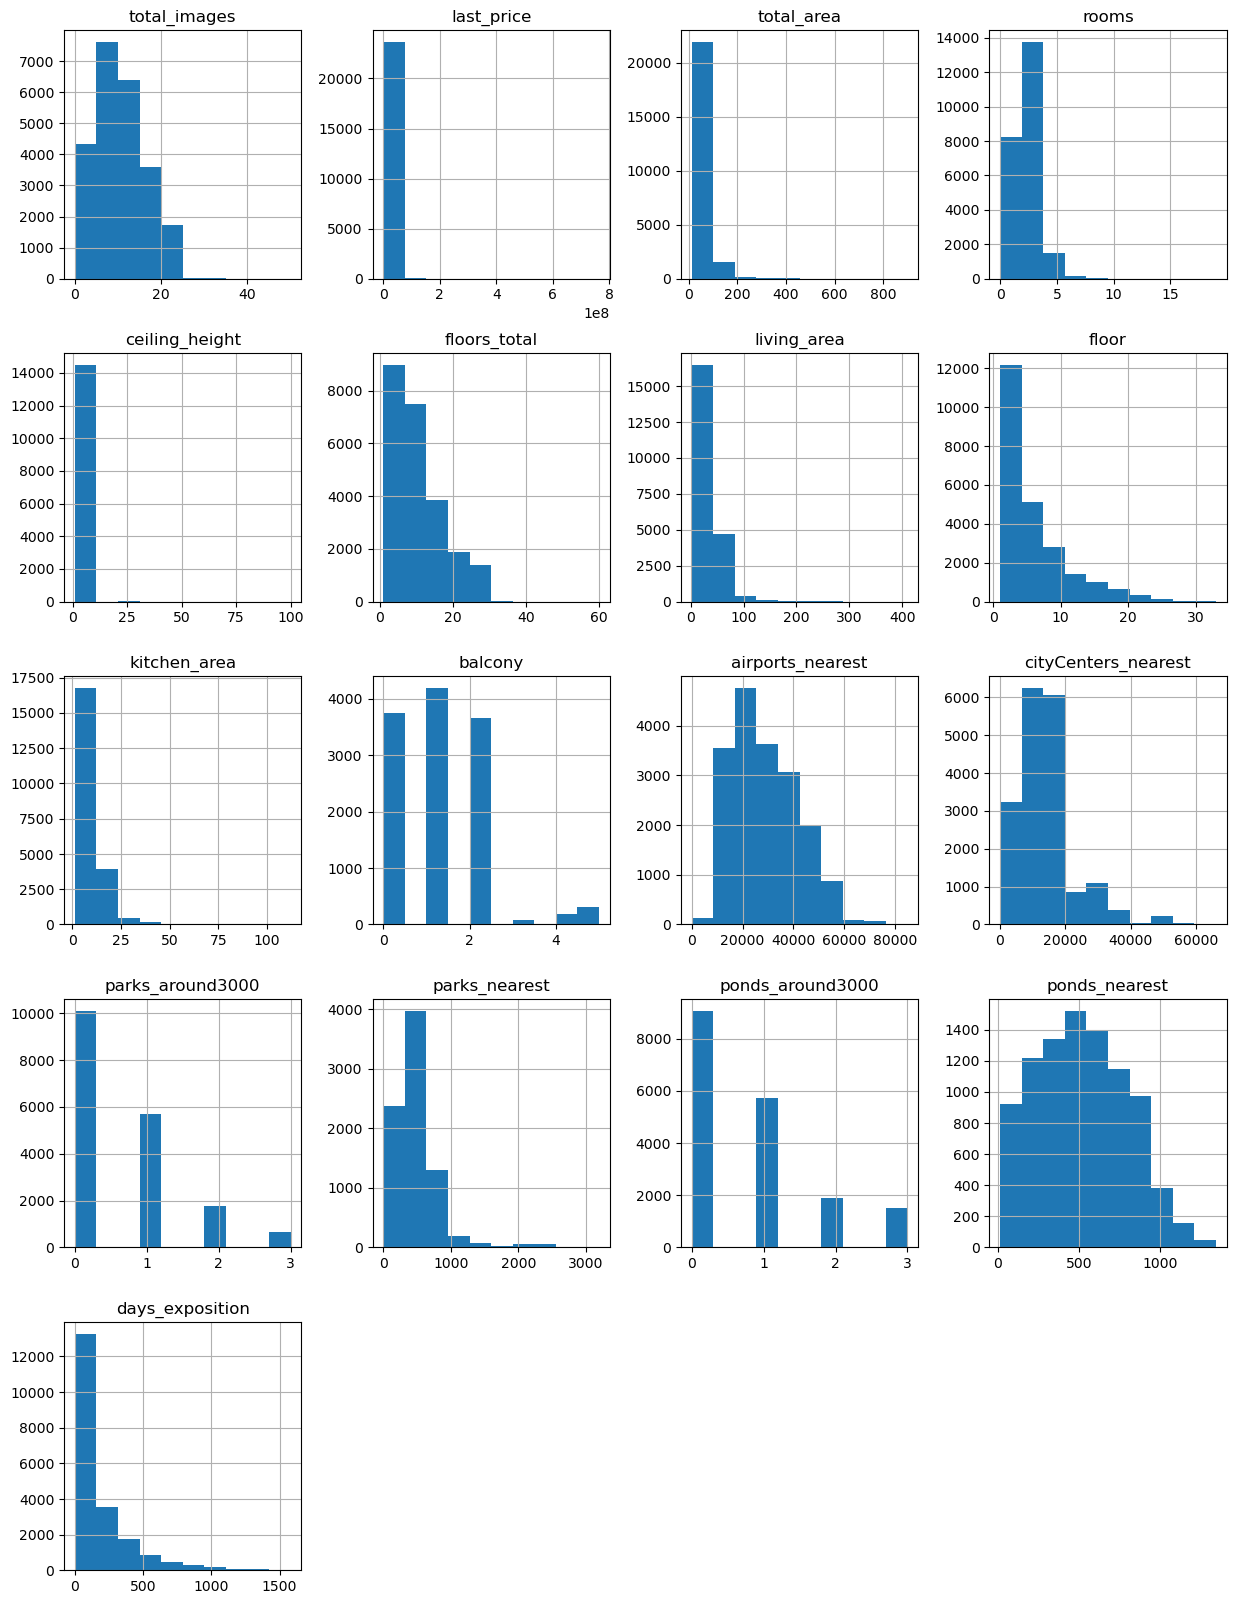

In [40]:
data.hist(figsize=(15, 20));

### 2 Предобработка данных

**Изучим пропуски в каждом столбце**

In [41]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [42]:
def pass_value_barh1(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Доля пропусков' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

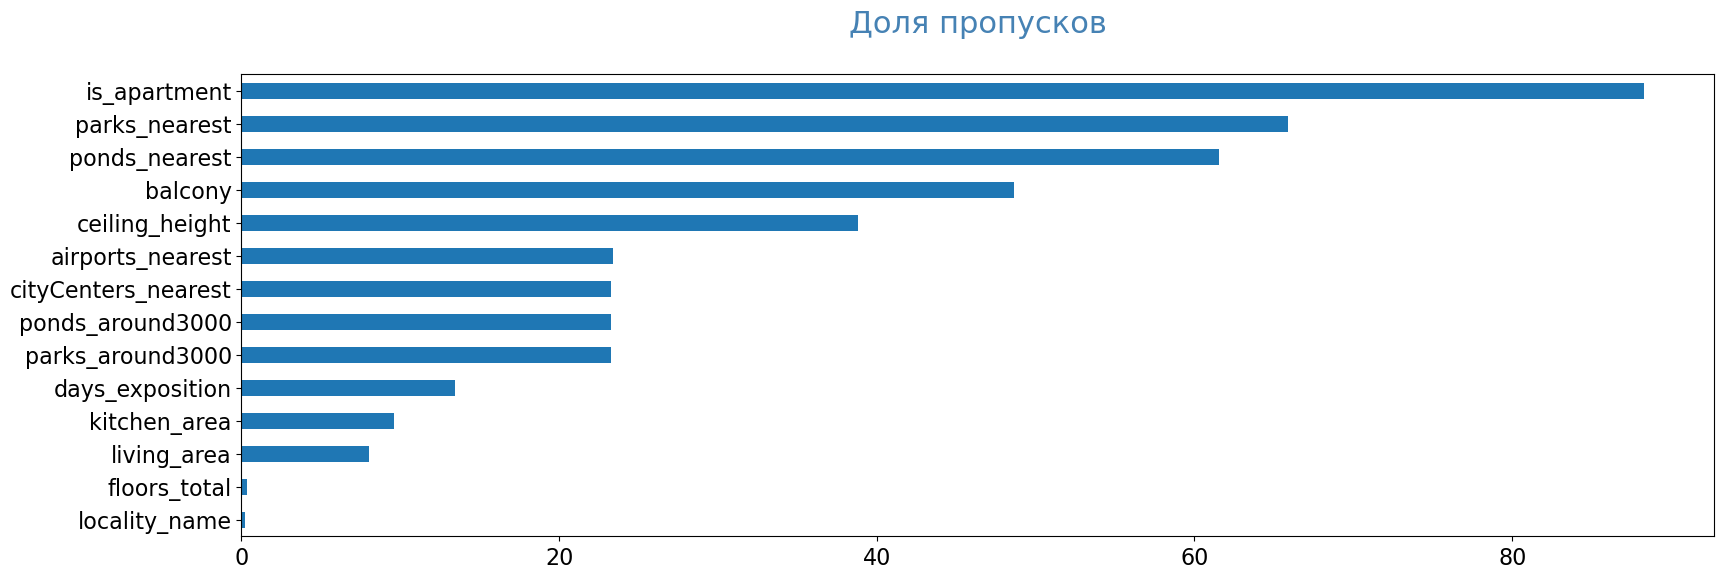

In [43]:
pass_value_barh1(data)

**9195 пропусков в столбце ``ceiling_height`` со значениям высоты потолка**

Вероятно, значения в этом столбце были пропущены в связи с тем, что высоту потолка обычно не указывают, если значение не является выделяющимся. Но если мы заменим значение средним или медианой, то данные исказятся. Оставим пропуски, а после это учтём.

In [44]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Следующий стобец с пропусками ``floors_total`` - общее количество этажей в доме**

**Пока не совсем понятно, чем можно заменить пропуски в данном столбце. Так как в дальнейшем нам нужно работать с этим столбцом, заменим пропуски медианным значением**

In [45]:
data['floors_total'] = data['floors_total'].fillna((data['floors_total']).median())

In [46]:
data = data.loc[(data['floor']) <= (data['floors_total'])]

In [47]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9162
floors_total                0
living_area              1893
floor                       0
is_apartment            20887
studio                      0
open_plan                   0
kitchen_area             2264
balcony                 11503
locality_name              49
airports_nearest         5535
cityCenters_nearest      5512
parks_around3000         5511
parks_nearest           15592
ponds_around3000         5511
ponds_nearest           14569
days_exposition          3176
dtype: int64

**Следующий столбец с пропусками `living_area` - жилая площадь**

Пропуски заменим нулём, далее учтём их.

In [48]:
data['living_area'] = data['living_area'].fillna(0)

In [49]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9162
floors_total                0
living_area                 0
floor                       0
is_apartment            20887
studio                      0
open_plan                   0
kitchen_area             2264
balcony                 11503
locality_name              49
airports_nearest         5535
cityCenters_nearest      5512
parks_around3000         5511
parks_nearest           15592
ponds_around3000         5511
ponds_nearest           14569
days_exposition          3176
dtype: int64

**В этом столбце от пропусков избавились!**

**Следующий столбец `is_apartment` - является ли жильё апартаментами**

Пропуски в данном столбце могут означать, что жилье апартаментами не является. Таким образом, заменим пропуски на значение `False`

In [50]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9162
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2264
balcony                 11503
locality_name              49
airports_nearest         5535
cityCenters_nearest      5512
parks_around3000         5511
parks_nearest           15592
ponds_around3000         5511
ponds_nearest           14569
days_exposition          3176
dtype: int64

**Следующий столбец с пропусками `kitchen_area` - площадь кухни. Поступим также, как и жилой площадью, но сначала проверим, возможно, пропуски в площади кухни означают, что квартира является студией, а кухня в таких квартирах включена в общую или жилую площадь.**

Проверим, существуют ли такие строки, в которых есть пропуск в `kitchen_area` и квартира не является студией, то есть в `studio` значение `False`. Если такие строки есть, то версия о том, что пропуск в площади кухнет означает, что квартира - студия, не верна.

In [51]:
kitchen_studio = data.pivot_table(index = data.index, values = ['kitchen_area', 'studio'])
kitchen_studio.loc[(kitchen_studio['kitchen_area'].isna()) & (kitchen_studio['studio'] == False)]

,kitchen_area,studio
3,NaN,0.0
30,NaN,0.0
37,NaN,0.0
44,NaN,0.0
59,NaN,0.0
...,...,...
23655,NaN,0.0
23663,NaN,0.0
23670,NaN,0.0
23679,NaN,0.0


Да, такие строки есть. Версию отвергаем.

**Посмотрим есть ли зависимость между `kitchen_area` и `total_area`, чтобы поступить с этими пропусками так же, как и в `living_area`**

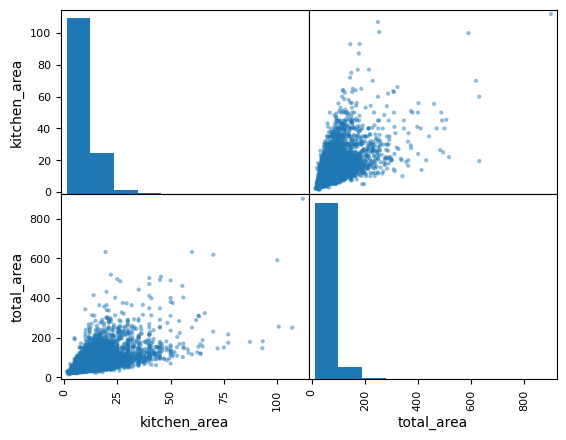

In [52]:
kitchen_and_total = data.pivot_table(index = data.index, values = ['kitchen_area', 'total_area'])
pd.plotting.scatter_matrix(kitchen_and_total);

Зависимость, как ни странно, есть. Поэтому найдем долю площади кухни от общей площади по категориям, которые создали ранее.

In [53]:
def categorize_area(meters):
    if 0 < meters <= 50:
        return 'маленькая'
    elif 51 <= meters <= 100:
        return 'средняя'
    elif 101 <= meters <= 150:
        return 'больше среднего'
    elif 151 <= meters <= 200:
        return 'большая'
    else:
        return 'огромная'

In [54]:
data['categorize_total_area'] = data['total_area'].apply(categorize_area)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,больше среднего
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,маленькая
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,средняя
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,0.00,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,большая
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,средняя
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,False,...,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,маленькая
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,маленькая
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,0.00,22,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,средняя
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,False,...,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,маленькая
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,средняя


In [55]:
share_min_kitchen = (data.loc[data['categorize_total_area'] == 'маленькая', 'kitchen_area'].median())/(data.loc[data['categorize_total_area'] == 'маленькая', 'total_area'].median())
share_avg_kitchen = (data.loc[data['categorize_total_area'] == 'средняя', 'kitchen_area'].median())/(data.loc[data['categorize_total_area'] == 'средняя', 'total_area'].median())
share_more_avg_kitchen = (data.loc[data['categorize_total_area'] == 'больше среднего', 'kitchen_area'].median())/(data.loc[data['categorize_total_area'] == 'больше среднего', 'total_area'].median())
share_big_kitchen = (data.loc[data['categorize_total_area'] == 'большая', 'kitchen_area'].median())/(data.loc[data['categorize_total_area'] == 'большая', 'total_area'].median())
share_huge_kitchen = (data.loc[data['categorize_total_area'] == 'огромная', 'kitchen_area'].median())/(data.loc[data['categorize_total_area'] == 'огромная', 'total_area'].median())

print('Доля кухонной площади от общей в маленьких квартирах:', share_min_kitchen)
print('Доля кухонной площади от общей в средних квартирах:', share_avg_kitchen)
print('Доля кухонной площади от общей в квартирах размером больше среднего:', share_more_avg_kitchen)
print('Доля кухонной площади от общей в больших квартирах:', share_big_kitchen)
print('Доля кухонной площади от общей в огромных квартирах:', share_huge_kitchen)

Доля кухонной площади от общей в маленьких квартирах: 0.20304568527918782
Доля кухонной площади от общей в средних квартирах: 0.15384615384615385
Доля кухонной площади от общей в квартирах размером больше среднего: 0.13663793103448277
Доля кухонной площади от общей в больших квартирах: 0.11546452953398635
Доля кухонной площади от общей в огромных квартирах: 0.1388888888888889


**Далее умножим полученную долю кухонной площади на медианное значение общей площади квартиры по каждой из категорий**

In [56]:
min_kitchen = share_min_kitchen * (data.loc[data['categorize_total_area'] == 'маленькая', 'total_area'].median())
avg_kitchen = share_avg_kitchen * (data.loc[data['categorize_total_area'] == 'средняя', 'total_area'].median())
avg_more_kitchen = share_more_avg_kitchen * (data.loc[data['categorize_total_area'] == 'больше среднего', 'total_area'].median())
big_kitchen = share_big_kitchen * (data.loc[data['categorize_total_area'] == 'большая', 'total_area'].median())
huge_kitchen = share_huge_kitchen * (data.loc[data['categorize_total_area'] == 'огромная', 'total_area'].median())

**И заполним пропуски в `kitchen_area` полученными значениями**

In [57]:
data.loc[(data['categorize_total_area'] == 'маленькая') & (data['kitchen_area'].isna()), 'kitchen_area'] = min_kitchen
data.loc[(data['categorize_total_area'] == 'средняя') & (data['kitchen_area'].isna()), 'kitchen_area'] = avg_kitchen
data.loc[(data['categorize_total_area'] == 'больше среднего') & (data['kitchen_area'].isna()), 'kitchen_area'] = avg_more_kitchen
data.loc[(data['categorize_total_area'] == 'большая') & (data['kitchen_area'].isna()), 'kitchen_area'] = big_kitchen
data.loc[(data['categorize_total_area'] == 'огромная') & (data['kitchen_area'].isna()), 'kitchen_area'] = huge_kitchen

data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height            9162
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                  11503
locality_name               49
airports_nearest          5535
cityCenters_nearest       5512
parks_around3000          5511
parks_nearest            15592
ponds_around3000          5511
ponds_nearest            14569
days_exposition           3176
categorize_total_area        0
dtype: int64

Кухни заполнили. Дальше идет столбец `balcony` - количество балконов в квартире.

**Вероятно, если продавец не указал количество балконов, значит, в квартире их вовсе нет. Заменим пропуски на 0**

In [58]:
data['balcony'] = data['balcony'].fillna(0)
data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height            9162
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name               49
airports_nearest          5535
cityCenters_nearest       5512
parks_around3000          5511
parks_nearest            15592
ponds_around3000          5511
ponds_nearest            14569
days_exposition           3176
categorize_total_area        0
dtype: int64

**Следующий столбец - `locality_name` - где находится квартира. Пропусков всего 49, посмотрим на них**

In [59]:
data.loc[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,средняя
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,средняя
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,маленькая
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,средняя
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,False,...,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,маленькая
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,средняя
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,средняя
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,0.00,6,False,...,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,средняя
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,...,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,средняя
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,False,...,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,маленькая


**Никаких зависимостей с остальными данными не обнаружено. Так как пропусков всего 49, удалим эти строки из датафейма**

In [60]:
data = data.dropna(subset = ['locality_name'])
data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height            9127
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5527
cityCenters_nearest       5504
parks_around3000          5503
parks_nearest            15558
ponds_around3000          5503
ponds_nearest            14545
days_exposition           3175
categorize_total_area        0
dtype: int64

**Следующие столбцы: `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest` заполнены картографическим способом, поэтому пропуски в них - техническая ошибка.**

**Но так как у нас есть такие столбцы, как `parks_around3000` и `ponds_around3000` - количество водоемов и парков в радиусе 3км, то мы можем уменьшить количество пропусков в `parks_nearest` и `ponds_nearest`. Например, если в столбце расстояния до ближайшего парка есть пропуск, а в столбце количества парков в радиусе 3км есть значение, значит в `parks_nearest` мы можем заполнить значением 3000м**

Но сначала необходимо проверить, есть ли такие строки.
Создадим сводную таблицу из столбцов `parks_around3000` и `parks_nearest`.

In [61]:
parks_none = data.pivot_table(index = data.index, values = ['parks_around3000', 'parks_nearest'])
parks_none.loc[(parks_none['parks_around3000'] != 0) & (parks_none['parks_nearest'].isna())]

,parks_around3000,parks_nearest


**Таких строк нет! Получется, если в радиусе 3км нет парка или водоёма, то расстояние ближайшего водоема или парка вовсе не указывается.**

Пропуски в картографических данных трогать не будем.

В столбцах `parks_around3000` и `ponds_around3000` пропуски заменим нулями, так как если там пропуск, значит таких парков и водоемов нет.

In [62]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

data.isna().sum()

total_images                 0
last_price                   0
total_area                   0
first_day_exposition         0
rooms                        0
ceiling_height            9127
floors_total                 0
living_area                  0
floor                        0
is_apartment                 0
studio                       0
open_plan                    0
kitchen_area                 0
balcony                      0
locality_name                0
airports_nearest          5527
cityCenters_nearest       5504
parks_around3000             0
parks_nearest            15558
ponds_around3000             0
ponds_nearest            14545
days_exposition           3175
categorize_total_area        0
dtype: int64

**Последний столбец с пропусками - `days_exposition` сколько дней было размещено объявление (от публикации до снятия). Вероятно, пропуски в данном столбце говорят о том, что квартира еще не продана**

Заменить нулями - некорректно, так как это будет означать, что квартира продалась в день публикации. Оставим как есть.

### Типы данных

Еще раз посмотрим на типы данных каждого столбца

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23613 non-null  int64  
 1   last_price             23613 non-null  float64
 2   total_area             23613 non-null  float64
 3   first_day_exposition   23613 non-null  object 
 4   rooms                  23613 non-null  int64  
 5   ceiling_height         14486 non-null  float64
 6   floors_total           23613 non-null  float64
 7   living_area            23613 non-null  float64
 8   floor                  23613 non-null  int64  
 9   is_apartment           23613 non-null  object 
 10  studio                 23613 non-null  bool   
 11  open_plan              23613 non-null  bool   
 12  kitchen_area           23613 non-null  float64
 13  balcony                23613 non-null  float64
 14  locality_name          23613 non-null  object 
 15  ai

`floors_total` - общее количество этажей может быть только целым числом, нужно изменить тип данных

`is_apartment` - является ли жилье апартаментами должен быть булевый тип данных.

`balcony` - количество балконов может быть только целым числом.

`parks_around3000` и `ponds_around3000` - количество водоемов и парков может быть только целым числом.

In [64]:
for i in data.columns:
    if (i == 'floors_total') or (i == 'balcony') or (i == 'parks_around3000') or (i == 'ponds_around3000'):
        data[i] = data[i].astype('int')
        
data['is_apartment'] = data['is_apartment'].astype('bool')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_images           23613 non-null  int64  
 1   last_price             23613 non-null  float64
 2   total_area             23613 non-null  float64
 3   first_day_exposition   23613 non-null  object 
 4   rooms                  23613 non-null  int64  
 5   ceiling_height         14486 non-null  float64
 6   floors_total           23613 non-null  int32  
 7   living_area            23613 non-null  float64
 8   floor                  23613 non-null  int64  
 9   is_apartment           23613 non-null  bool   
 10  studio                 23613 non-null  bool   
 11  open_plan              23613 non-null  bool   
 12  kitchen_area           23613 non-null  float64
 13  balcony                23613 non-null  int32  
 14  locality_name          23613 non-null  object 
 15  ai

`first_day_exposition` - еще один столбец, где нужно поменять тип данных. Так как это дата публикации, необходимо установить формат даты.

In [65]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23613 non-null  int64         
 1   last_price             23613 non-null  float64       
 2   total_area             23613 non-null  float64       
 3   first_day_exposition   23613 non-null  datetime64[ns]
 4   rooms                  23613 non-null  int64         
 5   ceiling_height         14486 non-null  float64       
 6   floors_total           23613 non-null  int32         
 7   living_area            23613 non-null  float64       
 8   floor                  23613 non-null  int64         
 9   is_apartment           23613 non-null  bool          
 10  studio                 23613 non-null  bool          
 11  open_plan              23613 non-null  bool          
 12  kitchen_area           23613 non-null  float64       
 13  b

### Дубликаты

В столбце `locality_name` - название населенного пункта присутствуют дубликаты. От них нужно избавиться.

**Посмотрим на уникальные значения данного столбца**

In [66]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

**Проблема неявных дубликатов в данном столбце - это разное написание слова `посёлок`, поменяем в слове `поселок` букву е.**

In [67]:
data['locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')

In [68]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'посёлок Молодцово',
       'посёлок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'посёлок Торковичи', 'посёлок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет

**Также посмотрим, есть ли дубликаты по комплексу строк**

In [69]:
data.duplicated(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'rooms']).sum()


207

In [70]:
data = data.drop_duplicates(subset=['total_area', 'floor', 'floors_total', 'cityCenters_nearest', 'locality_name', 'rooms'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23406 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           23406 non-null  int64         
 1   last_price             23406 non-null  float64       
 2   total_area             23406 non-null  float64       
 3   first_day_exposition   23406 non-null  datetime64[ns]
 4   rooms                  23406 non-null  int64         
 5   ceiling_height         14376 non-null  float64       
 6   floors_total           23406 non-null  int32         
 7   living_area            23406 non-null  float64       
 8   floor                  23406 non-null  int64         
 9   is_apartment           23406 non-null  bool          
 10  studio                 23406 non-null  bool          
 11  open_plan              23406 non-null  bool          
 12  kitchen_area           23406 non-null  float64       
 13  b

### Аномальные значения

Для выявления аномальных значений построим диаграмму размаха по каждому столбцу

In [71]:
import matplotlib.pyplot as plt

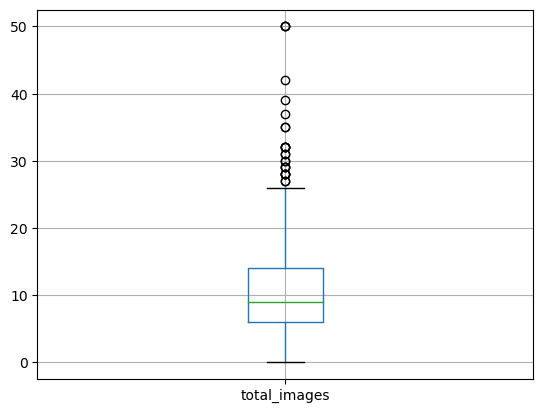

In [72]:
data.boxplot(column = ['total_images']);

In [73]:
data['total_images'].describe()

count    23406.000000
mean         9.877638
std          5.685339
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

`total_images` - количество изображений. Среднее значение и медиана практически одинаковые, значит аномалий в данном столбце нет.

**Следующий столбец `last_price`**

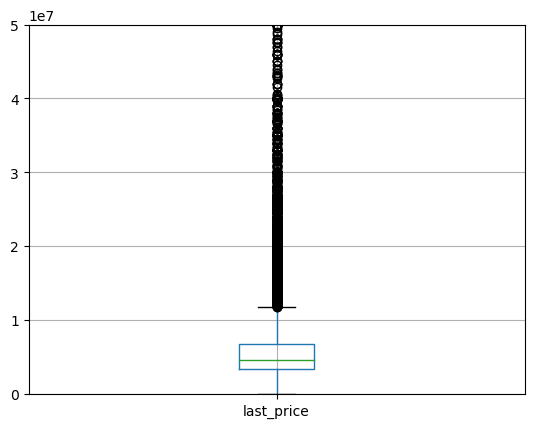

In [74]:
pd.options.display.float_format = '{:,.2f}'.format
data.boxplot(column=['last_price']);
plt.ylim(0, 50000000);

Рассмотреть диаграмму удалось лишь после уменьшение диапазона. Посмотрим описание стобца.

In [75]:
data['last_price'].describe()

count        23,406.00
mean      6,556,247.66
std      10,930,563.00
min          12,190.00
25%       3,450,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

Максимальное значение почти 800 миллионов! Но возможно это какой-то огромный замок. Посмотрим от чего зависит такая большая цена.

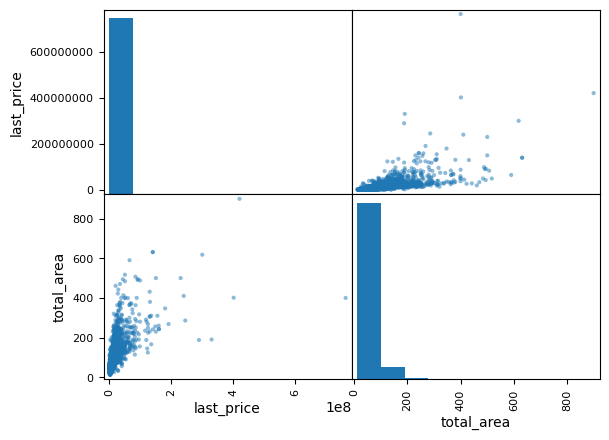

In [76]:
a = data.pivot_table(index = data.index, values = ['last_price', 'total_area'])
pd.plotting.scatter_matrix(a);

Зависимость есть. Чем больше квартира, тем выше у нее цена.

Но минимальные и максимальные значения будут мешать при изучении зависимости. Избавимся от значений выше усов и проследим, чтобы медиана была близка к среднему.

In [77]:
data = data.loc[((data['last_price']) >= 20000) & ((data['last_price']) <= 100000000)]
data['last_price'].describe()

count       23,368.00
mean     6,262,860.74
std      6,423,663.79
min        430,000.00
25%      3,450,000.00
50%      4,650,000.00
75%      6,790,000.00
max     99,000,000.00
Name: last_price, dtype: float64

**На очереди `total_area`**

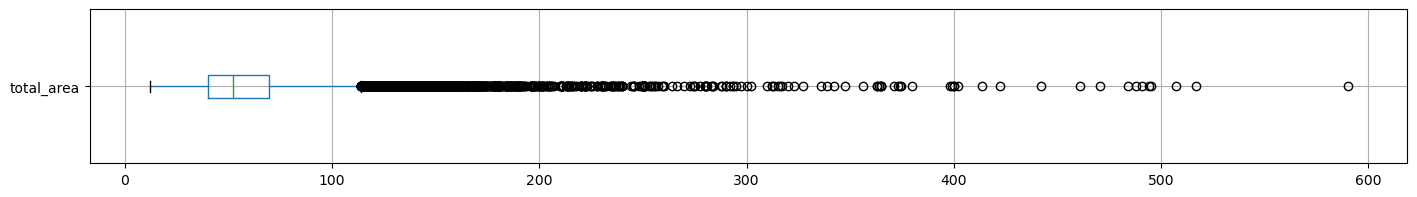

In [79]:
data.boxplot(column=['total_area'], vert = False, figsize = (17,2));

In [80]:
data['total_area'].describe()

count   23,368.00
mean        59.95
std         33.51
min         12.00
25%         40.00
50%         52.00
75%         69.60
max        590.00
Name: total_area, dtype: float64

Минимальная общая площадь - 12кв м. Посмотрим на них в соотношении с жилой площадью и кухней.

In [81]:
data.pivot_table(index=data.index, values=['total_area', 'living_area', 'kitchen_area']).sort_values(by='total_area')

,kitchen_area,living_area,total_area
19904,8.00,10.00,12.00
17961,8.00,0.00,13.00
19546,8.00,0.00,13.00
19807,8.00,10.00,13.00
19558,8.00,0.00,13.20
...,...,...,...
9826,14.00,0.00,494.10
12401,25.00,347.50,495.00
8018,45.50,301.50,507.00
4237,22.00,332.00,517.00


Все в порядке, в больших квартирах - большая кухня и жилая площадь, в маленьких наоборот.

Необходимо избавиться от аномальных значений (черные точки на графике).

In [82]:
data = data.loc[data['total_area'] <= 200]

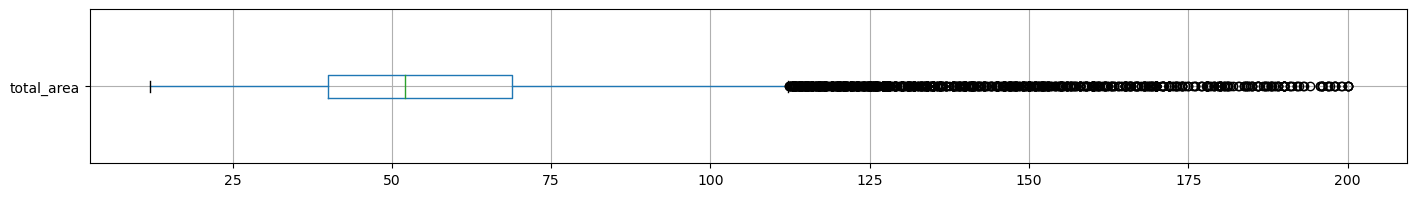

In [83]:
data.boxplot(column=['total_area'], vert = False, figsize = (17,2));

Еще нужно исключить такие квартиры, где сумма жилой площади и кухни превышает общую площадь.

In [84]:
data = data.loc[((data['living_area']) + (data['kitchen_area'])) <= (data['total_area'])]
data['total_area'].describe()

count   22,947.00
mean        58.41
std         26.43
min         13.00
25%         40.00
50%         52.00
75%         69.00
max        200.00
Name: total_area, dtype: float64

Количество строк уменьшилось.

**Следующий столбец - `rooms` количество комнат**

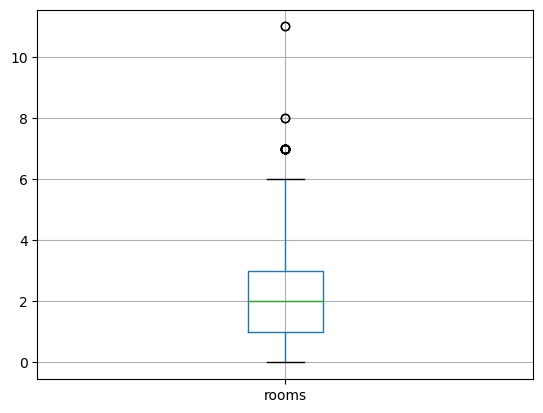

In [85]:
data.boxplot(column=['rooms']);

In [86]:
data['rooms'].describe()

count   22,947.00
mean         2.05
std          0.99
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         11.00
Name: rooms, dtype: float64

По диаграмме видим, что "усов" совсем немного. Удалим их.

In [87]:
data = data.loc[(data['rooms'] <= 6) & (data['rooms'] > 0)]
data['rooms'].describe()

count   22,803.00
mean         2.05
std          0.97
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: float64

Дальше потолки! Вспомним, что пропуски заполняли нулями.

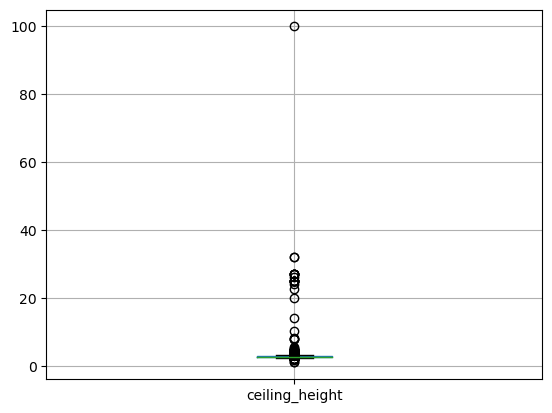

In [89]:
data.boxplot(column=['ceiling_height']);
#plt.ylim(0, 5);

In [90]:
data['ceiling_height'].describe()

count   14,055.00
mean         2.76
std          1.23
min          1.00
25%          2.50
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

Бывают ли потолки высотой 32м, а 1м? Вряд ли.

Возможно, большое значение высоты потолка - это пропуск запятой между цифрами. Изменим значения. Если высота потолка 20м, изменим ее на 2.0м.

In [91]:
data.loc[(data['ceiling_height'].isna()) | (data['ceiling_height'] > 15), 'ceiling_height'] = (data['ceiling_height']/10)
data['ceiling_height'].describe()

count   14,055.00
mean         2.72
std          0.31
min          1.00
25%          2.50
50%          2.65
75%          2.80
max         14.00
Name: ceiling_height, dtype: float64

Это исправили, но остались слишком большие значения - 14м и слишком маленькие - 1м. Избавимся от них.

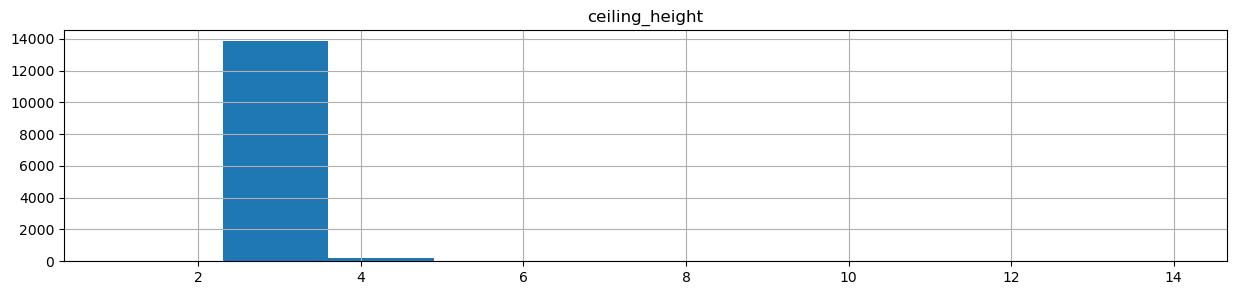

In [92]:
(data.loc[data['ceiling_height'] !=0]).hist(column = 'ceiling_height', figsize = (15,3), range = (1,14));

In [93]:
data = data.loc[((data['ceiling_height'] <= 4) | (data['ceiling_height'].isna())) & ((data['ceiling_height'] >= 2) | (data['ceiling_height'].isna()))]
data['ceiling_height'].describe()

count   14,014.00
mean         2.71
std          0.25
min          2.00
25%          2.50
50%          2.65
75%          2.80
max          4.00
Name: ceiling_height, dtype: float64

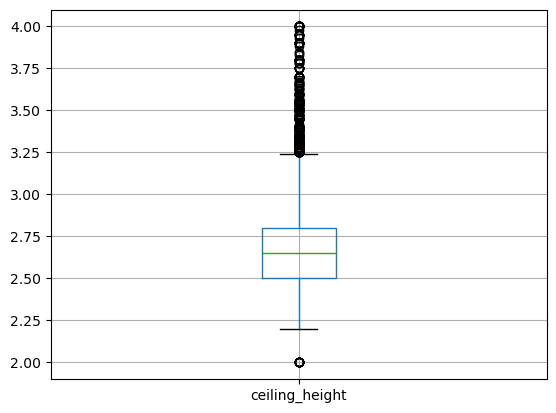

In [95]:
data.boxplot(column=['ceiling_height']);

С потолками разобрались!

**Следующий столбец `floors_total` - общее количество этажей в доме.**

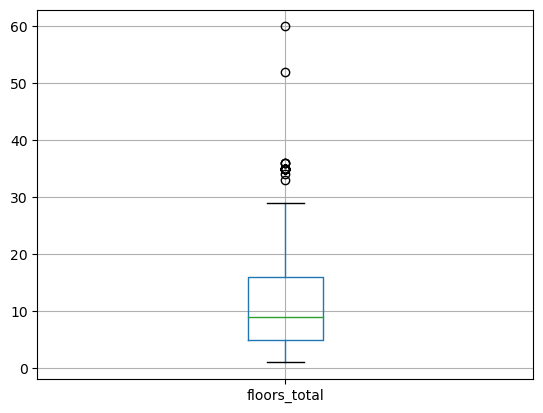

In [96]:
data.boxplot(column=['floors_total']);

In [97]:
data['floors_total'].describe()

count   22,762.00
mean        10.67
std          6.56
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

Есть квартиры в небоскребах по 50, 60 этажей. Такие квартиры имеют место быть. Но уберём аномалии.

In [98]:
data = data.loc[data['floors_total'] < 30]
data['floors_total'].describe()

count   22,734.00
mean        10.64
std          6.50
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         29.00
Name: floors_total, dtype: float64

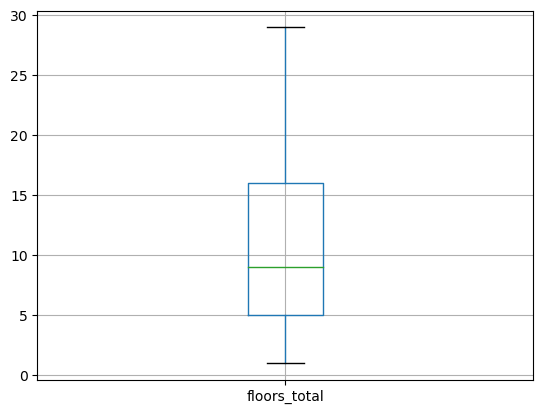

In [99]:
data.boxplot(column=['floors_total']);

**На очереди `living_area` - жилая площадь**

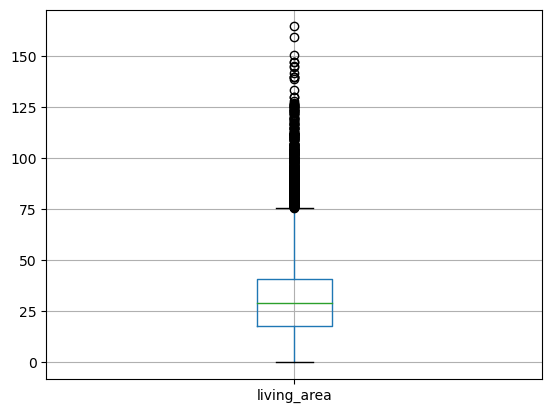

In [100]:
data.boxplot(column=['living_area']);

In [101]:
(data.loc[data['living_area'] != 0]['living_area']).describe()

count   20,918.00
mean        33.29
std         17.15
min          2.00
25%         18.60
50%         30.00
75%         42.00
max        164.70
Name: living_area, dtype: float64

Непонятно, что за жилая площадь 2кв. метра.

In [102]:
live = data.pivot_table(index=data.index, values=['living_area', 'total_area']).sort_values(by='living_area')
live.loc[live['living_area'] != 0]

,living_area,total_area
13915,2.00,52.00
23574,3.00,139.00
3242,3.00,41.00
21943,5.40,77.60
16431,6.00,31.00
...,...,...
11438,147.00,198.00
11800,147.20,192.30
9392,150.80,195.70
22904,159.60,190.00


На территории Санкт-Петербурга действует закон №407-65 «О порядке ведения учёта граждан в качестве нуждающихся в жилых помещениях». Он устанавливает минимумы:

учётная норма — 9 кв. м жилой площади на человека в отдельной квартире

Всё, что меньше 9кв. метров, удалим.

In [103]:
data = data.loc[(data['living_area'] > 9) | (data['living_area'] == 0)]
data['living_area'].describe()

count   22,713.00
mean        30.65
std         18.76
min          0.00
25%         17.80
50%         29.00
75%         41.00
max        164.70
Name: living_area, dtype: float64

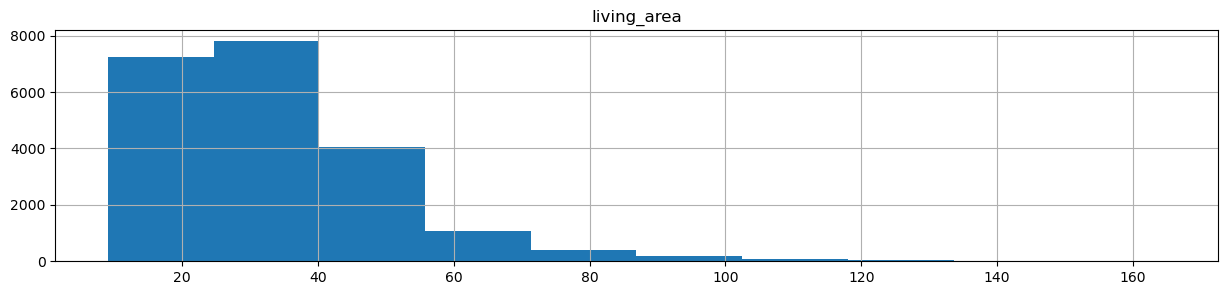

In [104]:
(data.loc[data['living_area'] !=0]).hist(column = 'living_area', figsize = (15,3));

Большие аномалии тоже удалим.

In [105]:
data = data.loc[data['living_area'] < 80]
data['living_area'].describe()

count   22,224.00
mean        29.21
std         16.06
min          0.00
25%         17.70
50%         29.00
75%         40.00
max         79.74
Name: living_area, dtype: float64

**Следующий столбец - `floor` этаж**

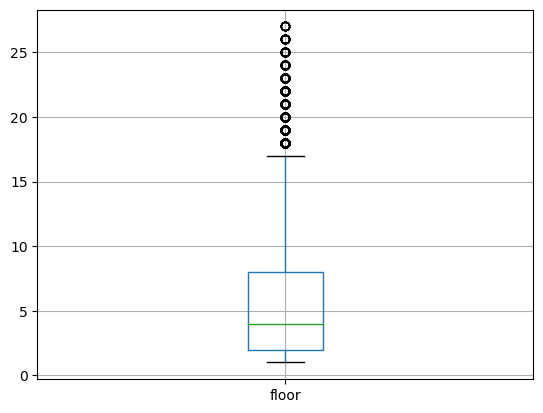

In [106]:
data.boxplot(column=['floor']);

In [107]:
data['floor'].describe()

count   22,224.00
mean         5.87
std          4.84
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: float64

Чаще всего продают квартиры на 5 этаже. Максимальное значение - 27 этаж, минимальное - 1 этаж. Все в порядке, раньше мы узнали, что максимальное количество этажей в доме - 60, а минимальное - 1. Но нужно проверить, что этаж продаваемой квартиры не превышает общее количество этажей в доме.

In [108]:
data = data.loc[(data['floor']) <= (data['floors_total'])]
data['floor'].describe()

count   22,224.00
mean         5.87
std          4.84
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         27.00
Name: floor, dtype: float64

**Общее количество строк изменилось, значит, такие квартиры были. Нужно избавиться от аномалий**

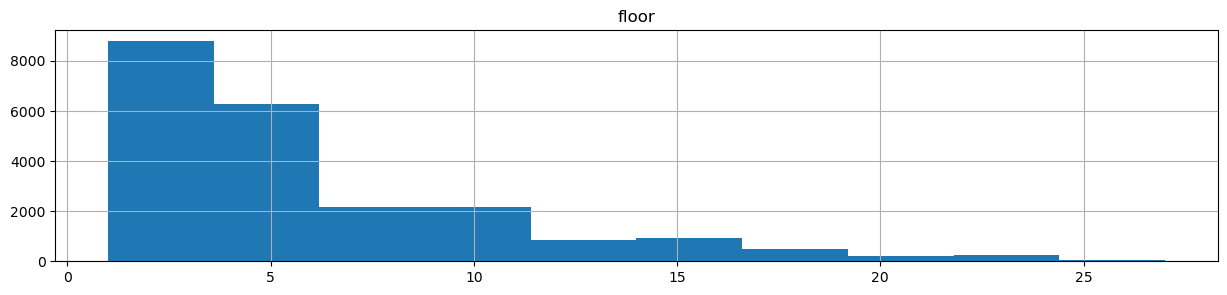

In [109]:
data.hist(column = 'floor', figsize = (15,3));

In [110]:
data = data.loc[data['floor'] <= 22]
data['floor'].describe()

count   22,007.00
mean         5.69
std          4.51
min          1.00
25%          2.00
50%          4.00
75%          8.00
max         22.00
Name: floor, dtype: float64

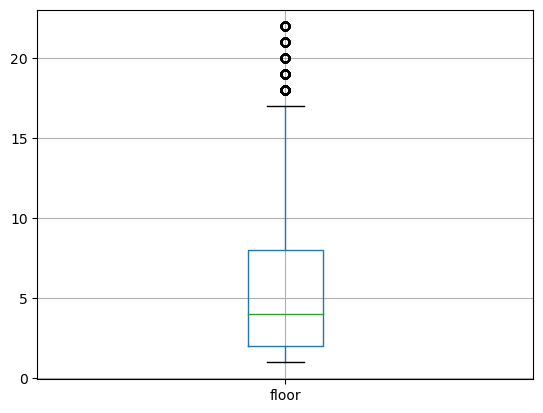

In [113]:
data.boxplot(column=['floor']);

**Следующий столбец - `kitchen_area` площадь кухни**

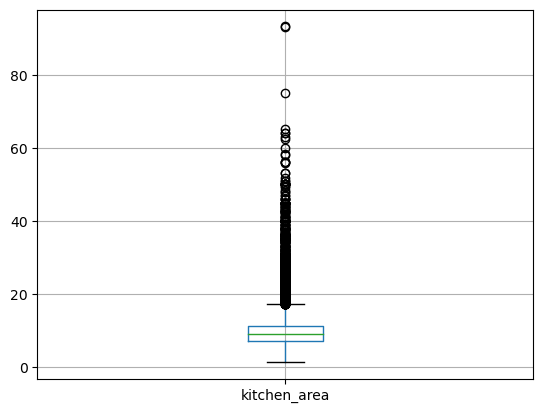

In [114]:
data.boxplot(column=['kitchen_area']);

In [115]:
data['kitchen_area'].describe()

count   22,007.00
mean        10.09
std          4.90
min          1.30
25%          7.10
50%          9.00
75%         11.13
max         93.20
Name: kitchen_area, dtype: float64

Удалим всё, что меньше 4 квадратных метров.

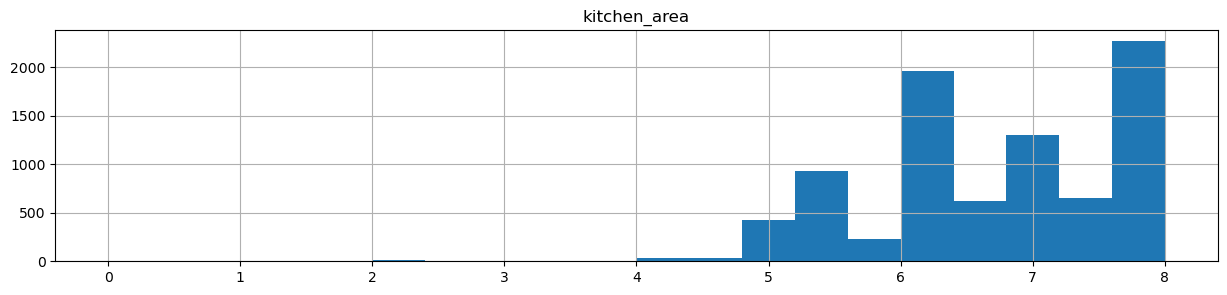

In [116]:
# check
data.hist(column = 'kitchen_area', bins = 20, figsize = (15,3), range = (0,8));

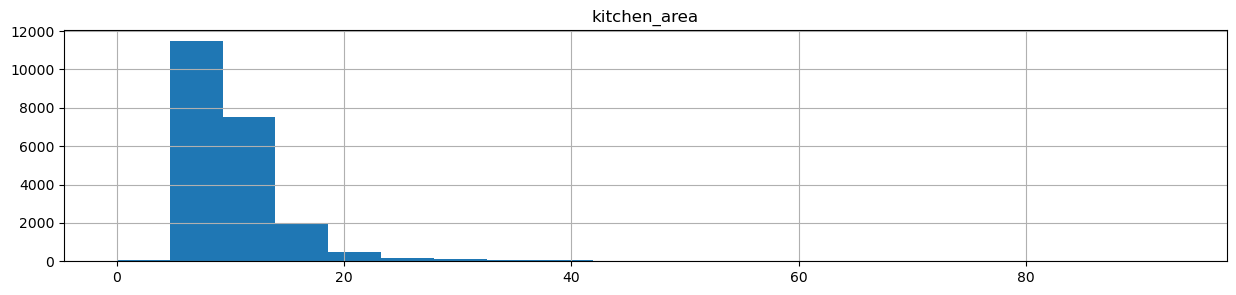

In [117]:
data.hist(column = 'kitchen_area', bins = 20, figsize = (15,3), range = (0,93));

In [118]:
data = data.loc[(data['kitchen_area'] >= 4) & (data['kitchen_area'] < 30)]
data['kitchen_area'].describe()

count   21,729.00
mean         9.77
std          3.70
min          4.00
25%          7.10
50%          9.00
75%         11.00
max         29.90
Name: kitchen_area, dtype: float64

**Следующий столбец - `balcony` количество балконов**

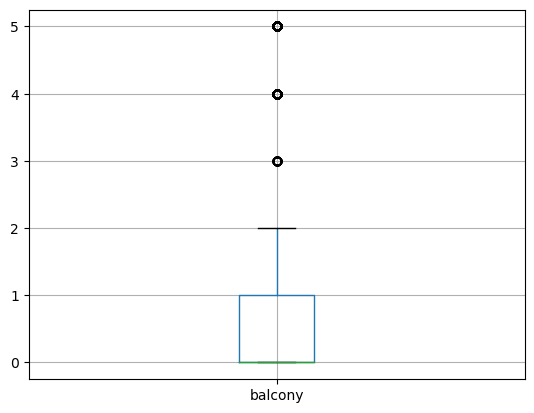

In [120]:
data.boxplot(column=['balcony']);

In [121]:
data['balcony'].describe()

count   21,729.00
mean         0.59
std          0.95
min          0.00
25%          0.00
50%          0.00
75%          1.00
max          5.00
Name: balcony, dtype: float64

**Следующий столбец `airport_nearest` - расстояние до аэропорта**

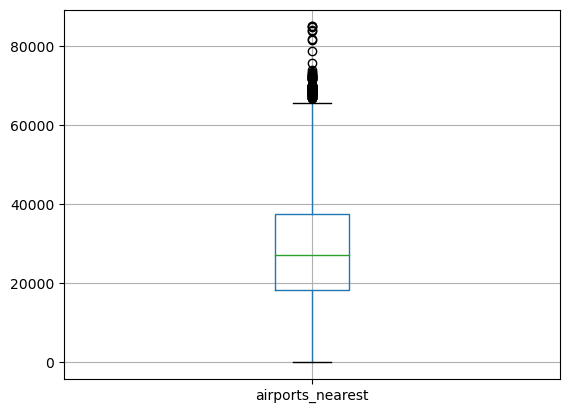

In [123]:
data.boxplot(column=['airports_nearest']);

In [124]:
data['airports_nearest'].describe()

count   16,583.00
mean    28,915.46
std     12,793.53
min          0.00
25%     18,357.00
50%     27,089.00
75%     37,434.00
max     84,869.00
Name: airports_nearest, dtype: float64

Возможно, могли бы быть такие квартиры, у которых расстояние до аэропорта 0 м, но таких квартир не оказалось.

**Далее столбец `cityCenters_nearest`**

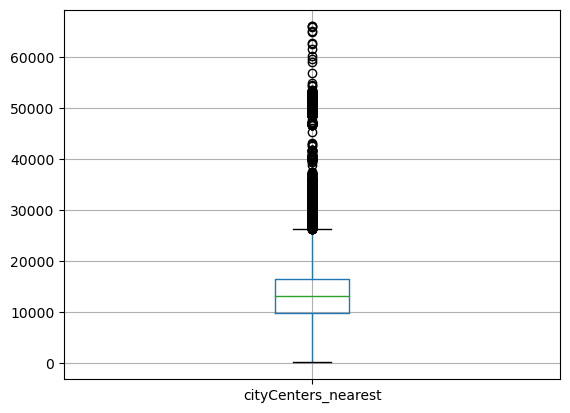

In [125]:
data.boxplot(column=['cityCenters_nearest']);

In [126]:
data['cityCenters_nearest'].describe()

count   16,603.00
mean    14,581.52
std      8,612.21
min        208.00
25%      9,893.50
50%     13,275.00
75%     16,453.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

Никаких аномалий не обнаружено.

**Следующий столбец `parks_nearest`**

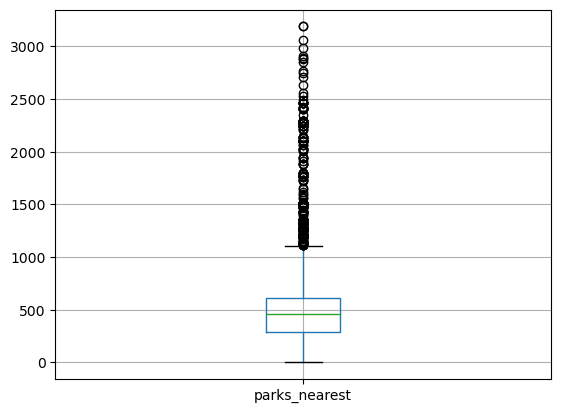

In [127]:
data.boxplot(column=['parks_nearest']);

In [128]:
data['parks_nearest'].describe()

count   7,265.00
mean      494.00
std       342.08
min         1.00
25%       289.00
50%       458.00
75%       616.00
max     3,190.00
Name: parks_nearest, dtype: float64

Минимальное значение - 4 метра. Совсем близко с парком. Аномалий не обнаружено.

**Далее идёт `ponds_nearest` - расстояние до ближайшего водоема**

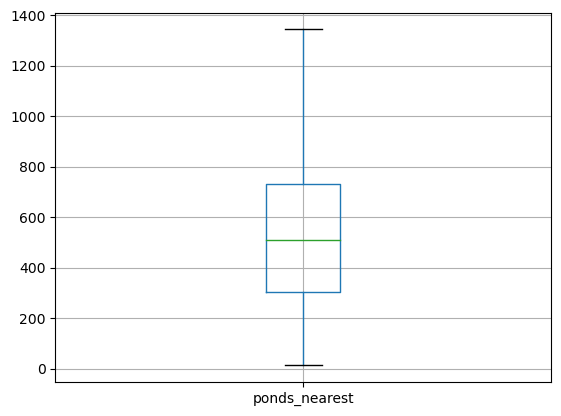

In [129]:
data.boxplot(column=['ponds_nearest']);

In [130]:
data['ponds_nearest'].describe()

count   8,141.00
mean      524.85
std       276.32
min        13.00
25%       303.00
50%       509.00
75%       733.00
max     1,344.00
Name: ponds_nearest, dtype: float64

Аномалий нет.

Далее столбец `days_exposition`.

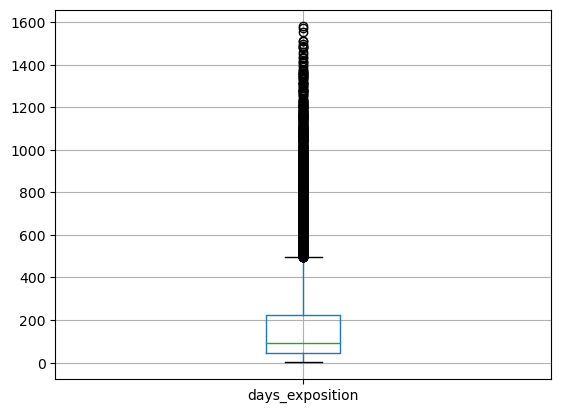

In [132]:
data.boxplot(column=['days_exposition']);

In [133]:
data['days_exposition'].describe()

count   18,903.00
mean       176.77
std        214.95
min          1.00
25%         44.00
50%         93.00
75%        225.00
max      1,580.00
Name: days_exposition, dtype: float64

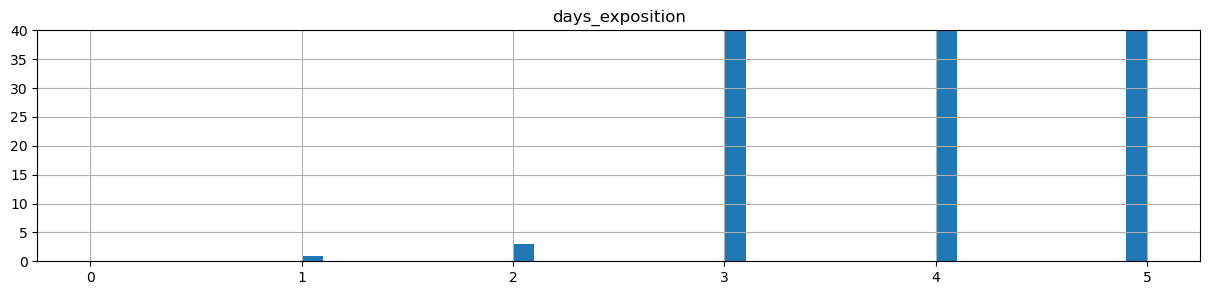

In [134]:
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));
plt.ylim(0, 40);

Удалим всё что меньше 3 дней продажи.

In [135]:
data = data.loc[(data['days_exposition'] >= 3) | (data['days_exposition'].isna())]
data['days_exposition'].describe()

count   18,899.00
mean       176.80
std        214.96
min          3.00
25%         44.00
50%         93.00
75%        225.00
max      1,580.00
Name: days_exposition, dtype: float64

### Новые столбцы

**Добавим новый столбец `cost_of_one` с ценой одного квадратного метра**

In [136]:
def abcd(cost, area):
    return cost/area
data['cost_of_one'] = data.apply(lambda x: abcd(x['last_price'], x['total_area']), axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area,cost_of_one
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,Санкт-Петербург,"18,863.00","16,028.00",1,482.00,2,755.00,NaN,больше среднего,"120,370.37"
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,...,посёлок Шушары,"12,817.00","18,603.00",0,NaN,0,NaN,81.00,маленькая,"82,920.79"
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,...,Санкт-Петербург,"21,741.00","13,933.00",1,90.00,2,574.00,558.00,средняя,"92,785.71"
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,0.00,9,False,...,Санкт-Петербург,"28,098.00","6,800.00",2,84.00,3,234.00,424.00,большая,"408,176.10"
5,10,"2,890,000.00",30.40,2018-09-10,1,NaN,12,14.40,5,False,...,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.00,маленькая,"95,065.79"
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,False,...,посёлок Парголово,"52,996.00","19,143.00",0,NaN,0,NaN,155.00,маленькая,"99,195.71"
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,0.00,22,False,...,Санкт-Петербург,"23,982.00","11,634.00",0,NaN,0,NaN,NaN,средняя,"110,544.69"
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,...,Санкт-Петербург,"50,898.00","15,008.00",0,NaN,0,NaN,289.00,средняя,"88,524.59"
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,...,Санкт-Петербург,"38,357.00","13,878.00",1,310.00,2,553.00,137.00,маленькая,"127,525.25"
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,...,Ломоносов,"48,252.00","51,677.00",0,NaN,0,NaN,7.00,маленькая,"75,000.00"


**Добавим новый столбец `day_publication` с днем недели публикации, где 0-понедельник, 1-вторник и так далее.**

In [137]:
data['day_publication'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area,cost_of_one,day_publication
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,"18,863.00","16,028.00",1,482.00,2,755.00,NaN,больше среднего,"120,370.37",3
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,...,"12,817.00","18,603.00",0,NaN,0,NaN,81.00,маленькая,"82,920.79",1
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,...,"21,741.00","13,933.00",1,90.00,2,574.00,558.00,средняя,"92,785.71",3
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,0.00,9,False,...,"28,098.00","6,800.00",2,84.00,3,234.00,424.00,большая,"408,176.10",4
5,10,"2,890,000.00",30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,NaN,0,NaN,0,NaN,55.00,маленькая,"95,065.79",0
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,False,...,"52,996.00","19,143.00",0,NaN,0,NaN,155.00,маленькая,"99,195.71",3
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,0.00,22,False,...,"23,982.00","11,634.00",0,NaN,0,NaN,NaN,средняя,"110,544.69",3
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,...,"50,898.00","15,008.00",0,NaN,0,NaN,289.00,средняя,"88,524.59",6
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,...,"38,357.00","13,878.00",1,310.00,2,553.00,137.00,маленькая,"127,525.25",3
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,...,"48,252.00","51,677.00",0,NaN,0,NaN,7.00,маленькая,"75,000.00",0


**Добавим новый столбец `month_publication` с месяцем публикации**

In [138]:
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area,cost_of_one,day_publication,month_publication
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,"16,028.00",1,482.00,2,755.00,NaN,больше среднего,"120,370.37",3,3
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,...,"18,603.00",0,NaN,0,NaN,81.00,маленькая,"82,920.79",1,12
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,...,"13,933.00",1,90.00,2,574.00,558.00,средняя,"92,785.71",3,8
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,0.00,9,False,...,"6,800.00",2,84.00,3,234.00,424.00,большая,"408,176.10",4,7
5,10,"2,890,000.00",30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,0,NaN,0,NaN,55.00,маленькая,"95,065.79",0,9
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,False,...,"19,143.00",0,NaN,0,NaN,155.00,маленькая,"99,195.71",3,11
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,0.00,22,False,...,"11,634.00",0,NaN,0,NaN,NaN,средняя,"110,544.69",3,4
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,...,"15,008.00",0,NaN,0,NaN,289.00,средняя,"88,524.59",6,2
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,...,"13,878.00",1,310.00,2,553.00,137.00,маленькая,"127,525.25",3,11
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,...,"51,677.00",0,NaN,0,NaN,7.00,маленькая,"75,000.00",0,8


**Добавим новый столбец `year_publication` с годом публикации**

In [139]:
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area,cost_of_one,day_publication,month_publication,year_publication
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,1,482.00,2,755.00,NaN,больше среднего,"120,370.37",3,3,2019
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,NaN,0,NaN,81.00,маленькая,"82,920.79",1,12,2018
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,...,1,90.00,2,574.00,558.00,средняя,"92,785.71",3,8,2015
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,0.00,9,False,...,2,84.00,3,234.00,424.00,большая,"408,176.10",4,7,2015
5,10,"2,890,000.00",30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,NaN,0,NaN,55.00,маленькая,"95,065.79",0,9,2018
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0,NaN,0,NaN,155.00,маленькая,"99,195.71",3,11,2017
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,0.00,22,False,...,0,NaN,0,NaN,NaN,средняя,"110,544.69",3,4,2019
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,0,NaN,289.00,средняя,"88,524.59",6,2,2017
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,...,1,310.00,2,553.00,137.00,маленькая,"127,525.25",3,11,2017
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0,NaN,0,NaN,7.00,маленькая,"75,000.00",0,8,2018


**Добавим новый столбец `floor_category` идентифицирования этажа (значения — «первый», «последний», «другой»)**

In [140]:
def floor_categorize(floor, maxi):
    if floor == 1:
        return 'первый'
    elif floor == maxi:
        return 'последний'
    elif floor == 0:
        return 'нулевой'
    elif floor < 0:
        return 'подвал'
    else:
        return 'другой'

data['floor_category'] = data.apply(lambda y: floor_categorize(y['floor'], y['floors_total']), axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area,cost_of_one,day_publication,month_publication,year_publication,floor_category
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,482.00,2,755.00,NaN,больше среднего,"120,370.37",3,3,2019,другой
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,0,NaN,81.00,маленькая,"82,920.79",1,12,2018,первый
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,...,90.00,2,574.00,558.00,средняя,"92,785.71",3,8,2015,другой
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,0.00,9,False,...,84.00,3,234.00,424.00,большая,"408,176.10",4,7,2015,другой
5,10,"2,890,000.00",30.40,2018-09-10,1,NaN,12,14.40,5,False,...,NaN,0,NaN,55.00,маленькая,"95,065.79",0,9,2018,другой
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,False,...,NaN,0,NaN,155.00,маленькая,"99,195.71",3,11,2017,другой
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,0.00,22,False,...,NaN,0,NaN,NaN,средняя,"110,544.69",3,4,2019,другой
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,...,NaN,0,NaN,289.00,средняя,"88,524.59",6,2,2017,другой
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,...,310.00,2,553.00,137.00,маленькая,"127,525.25",3,11,2017,другой
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,...,NaN,0,NaN,7.00,маленькая,"75,000.00",0,8,2018,другой


**Добавим новый столбец `centre_nearest_km` расстояние до центра города в километрах**

In [141]:
data['centre_nearest_km'] = round(data['cityCenters_nearest']/1000)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area,cost_of_one,day_publication,month_publication,year_publication,floor_category,centre_nearest_km
0,20,"13,000,000.00",108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.00,NaN,больше среднего,"120,370.37",3,3,2019,другой,16.00
1,7,"3,350,000.00",40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,NaN,81.00,маленькая,"82,920.79",1,12,2018,первый,19.00
2,10,"5,196,000.00",56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2,574.00,558.00,средняя,"92,785.71",3,8,2015,другой,14.00
3,0,"64,900,000.00",159.00,2015-07-24,3,NaN,14,0.00,9,False,...,3,234.00,424.00,большая,"408,176.10",4,7,2015,другой,7.00
5,10,"2,890,000.00",30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,NaN,55.00,маленькая,"95,065.79",0,9,2018,другой,NaN
6,6,"3,700,000.00",37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0,NaN,155.00,маленькая,"99,195.71",3,11,2017,другой,19.00
7,5,"7,915,000.00",71.60,2019-04-18,2,NaN,24,0.00,22,False,...,0,NaN,NaN,средняя,"110,544.69",3,4,2019,другой,12.00
9,18,"5,400,000.00",61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289.00,средняя,"88,524.59",6,2,2017,другой,15.00
10,5,"5,050,000.00",39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2,553.00,137.00,маленькая,"127,525.25",3,11,2017,другой,14.00
11,9,"3,300,000.00",44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0,NaN,7.00,маленькая,"75,000.00",0,8,2018,другой,52.00


### Исследовательский анализ данных

Отдельно изучим некоторые показатели

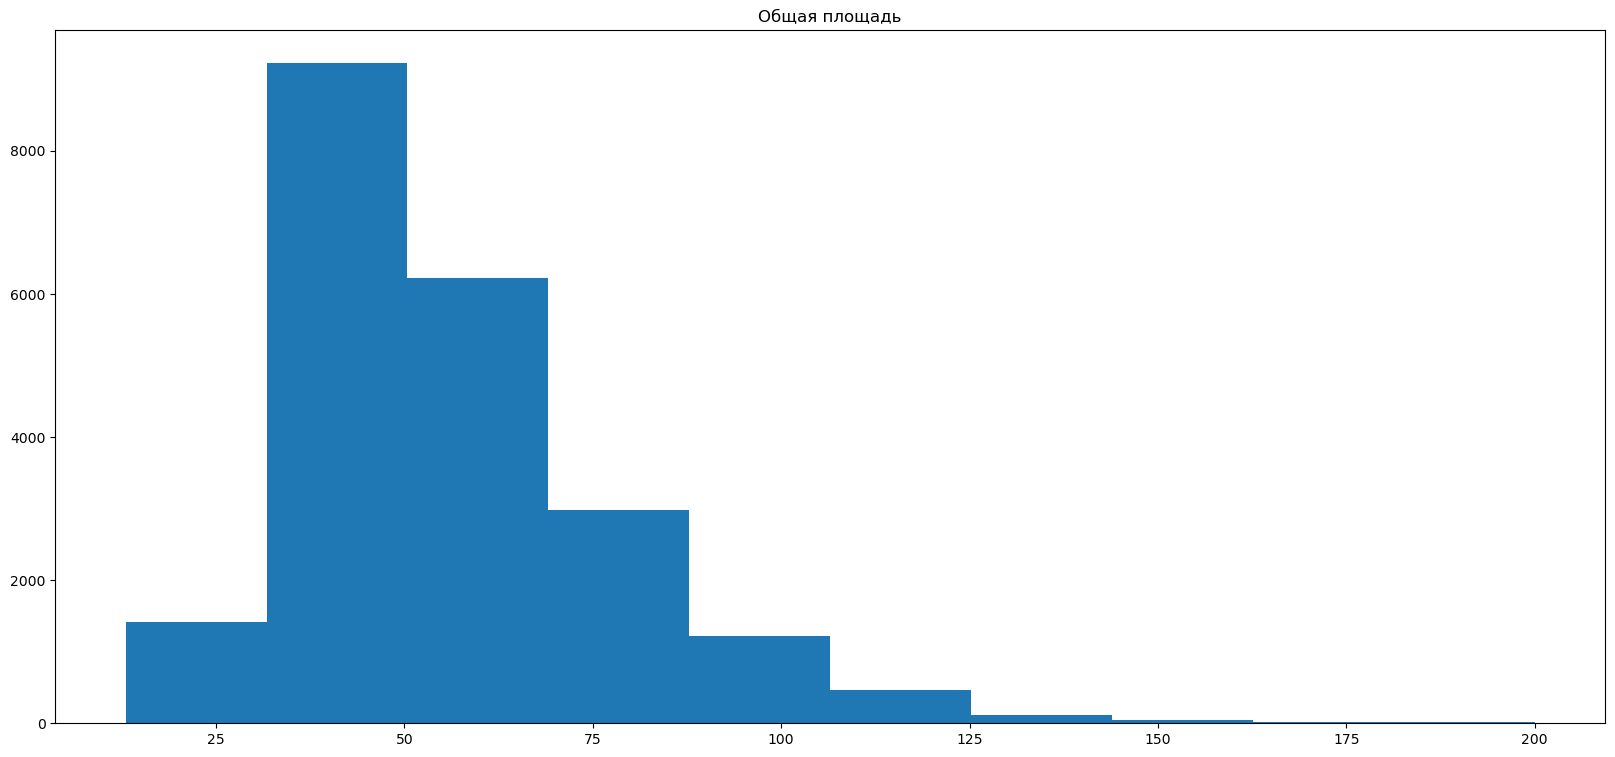

In [142]:
#data.hist(column='total_area', figsize=(20,9)).set_title('Общая площадь')

fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['total_area'])
ax.set_title('Общая площадь')
plt.show()

**Гистограмма по столбцу `total_area` - общая площадь квартиры говорит нам о том, что большинство квартир в датафреме имеет площадь примерно от 20кв. метров до 80кв. метров. Чем больше площадь квартир, тем меньше таких квартир встречается.**

Далее рассмотрим жилую площадь

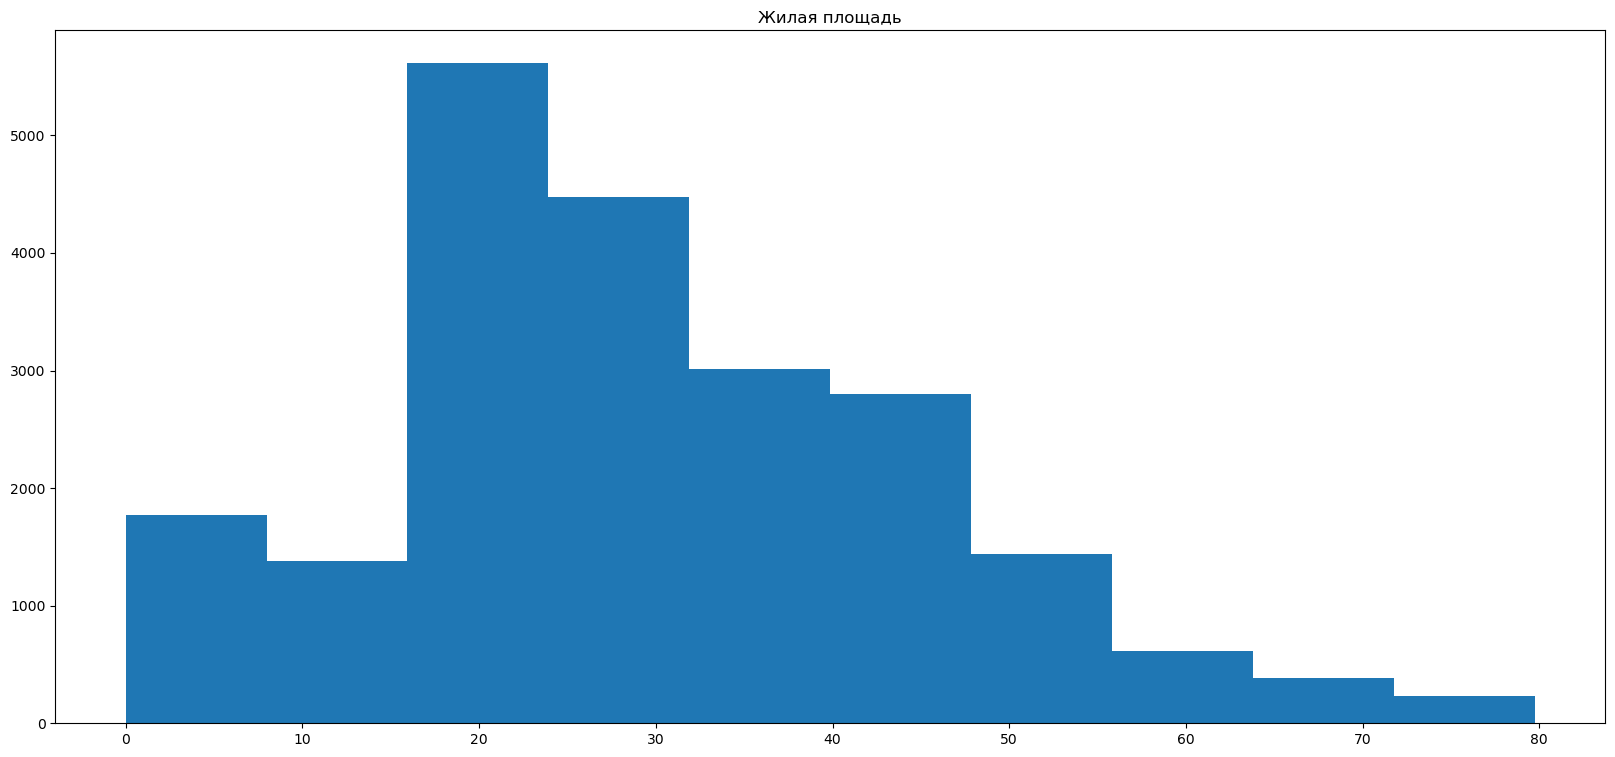

In [143]:
#data.hist(column='living_area', figsize=(20,9));

fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['living_area'])
ax.set_title('Жилая площадь')
plt.show()

**Гистограмма очень похожа на предыдущую. Большинство квартир в датафрейме имеют жилую площадь примерно от 10кв. метров до 40кв. метров. Квартир с большой жилой площадью значительно меньше.**

Рассмотрим кухни

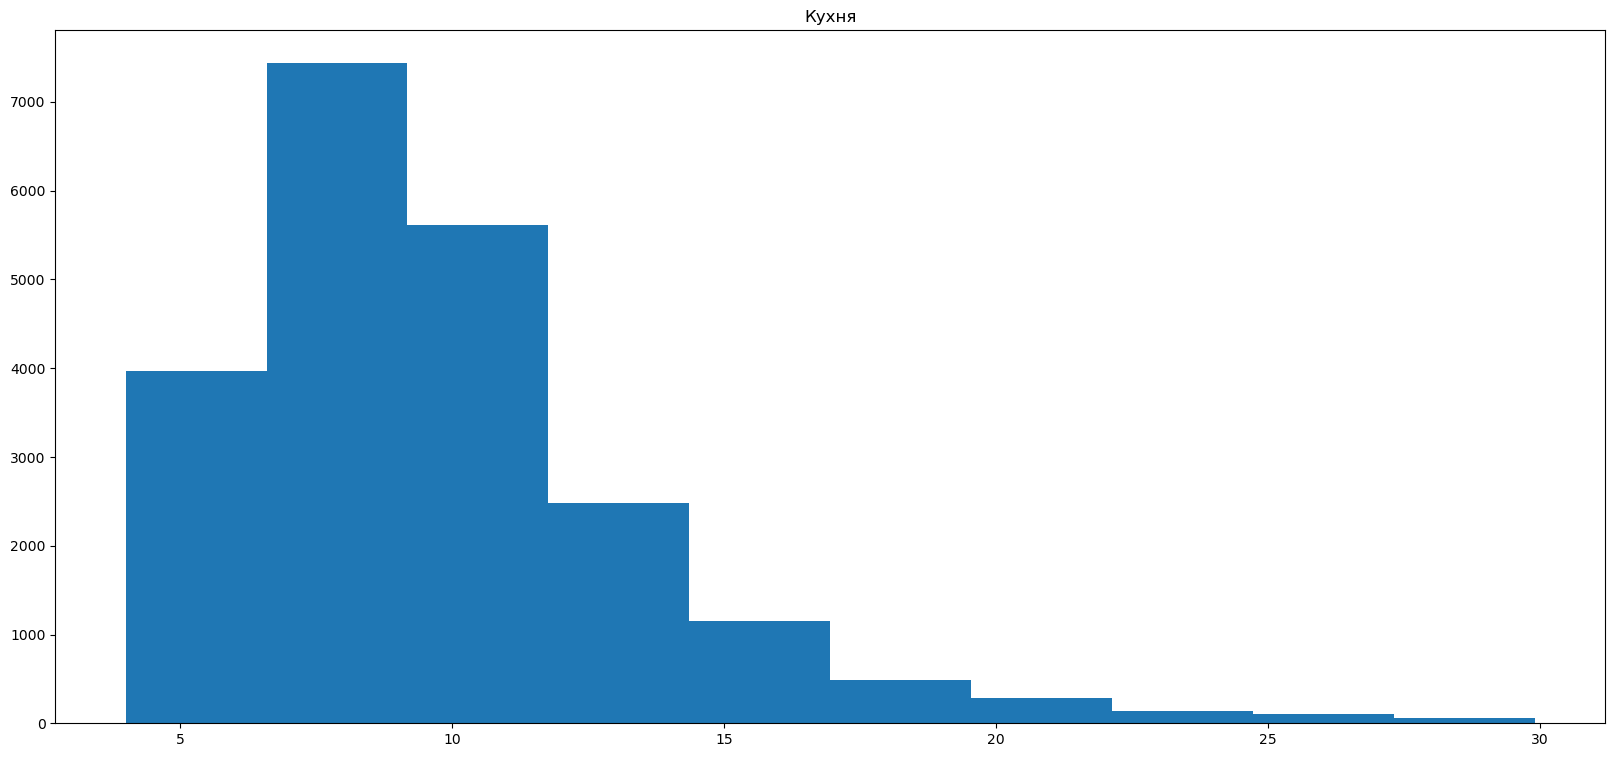

In [144]:
#data.hist(column='kitchen_area')

fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['kitchen_area'])
ax.set_title('Кухня')
plt.show()

**Чаще всего встречаются квартиры с кухней оаоло 7 квадратных метров.**

Следующий параметр - цена квартиры

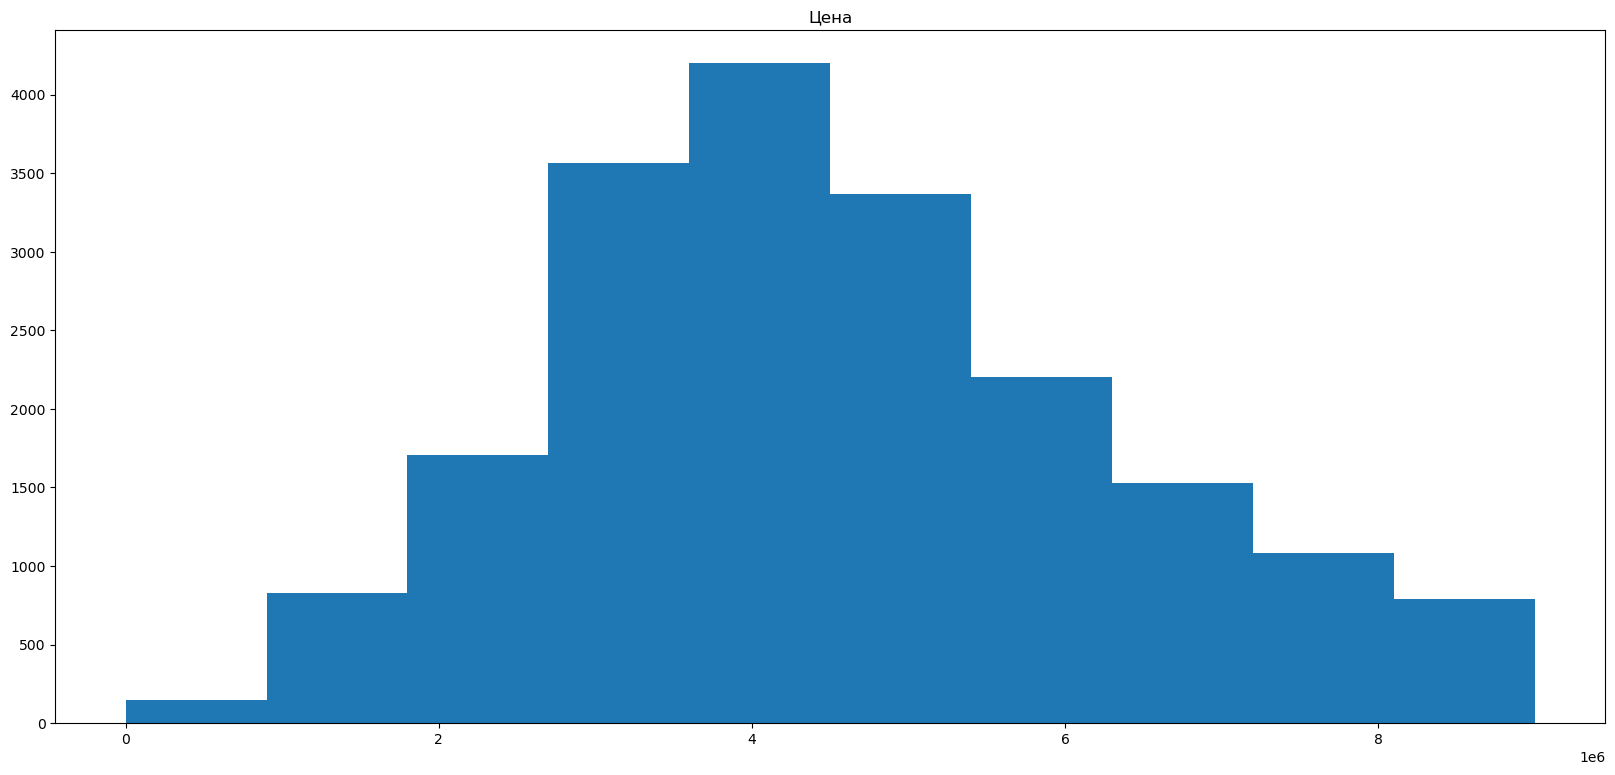

In [145]:
#data.hist(column='last_price', range=(0, 70000000))

fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['last_price'], range=(0, 9000000))
ax.set_title('Цена')
plt.show()

In [146]:
data['last_price'].describe()

count       21,725.00
mean     5,521,180.47
std      4,041,281.84
min        430,000.00
25%      3,400,000.00
50%      4,550,000.00
75%      6,425,000.00
max     98,000,000.00
Name: last_price, dtype: float64

**Большинство квартир стоят порядка 5 миллионов рублей.**

Далее изучим количество комнат

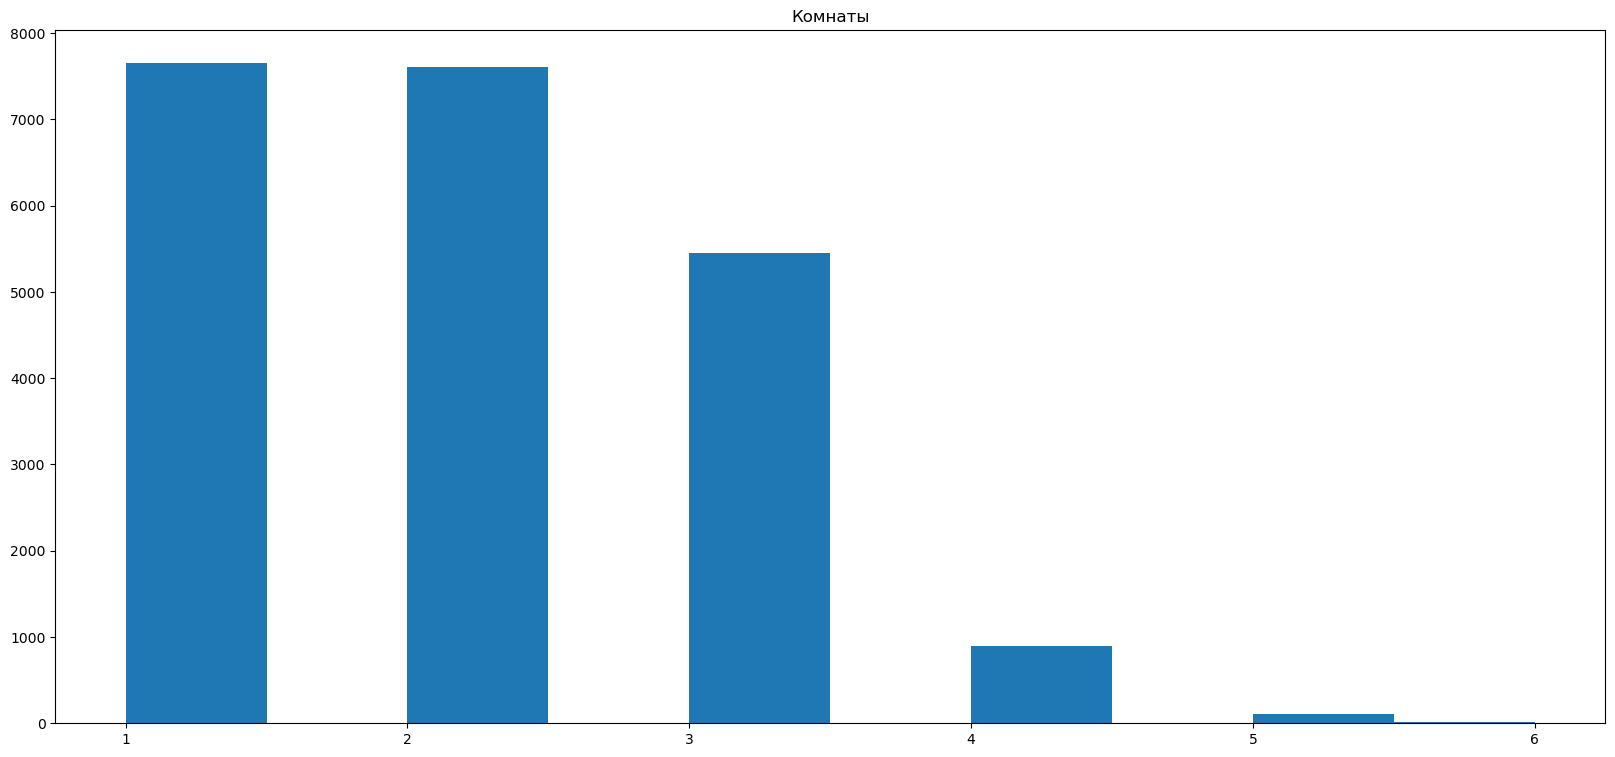

In [147]:
#data.hist(column='rooms')
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['rooms'])
ax.set_title('Комнаты')
plt.show()

In [148]:
data['rooms'].describe()

count   21,725.00
mean         2.00
std          0.91
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          6.00
Name: rooms, dtype: float64

**Большинство квартир имеют 1-2 комнаты. Чем больше комнат, тем реже такую квартиру можно встретить.**

Теперь рассмотрим высоту потолков

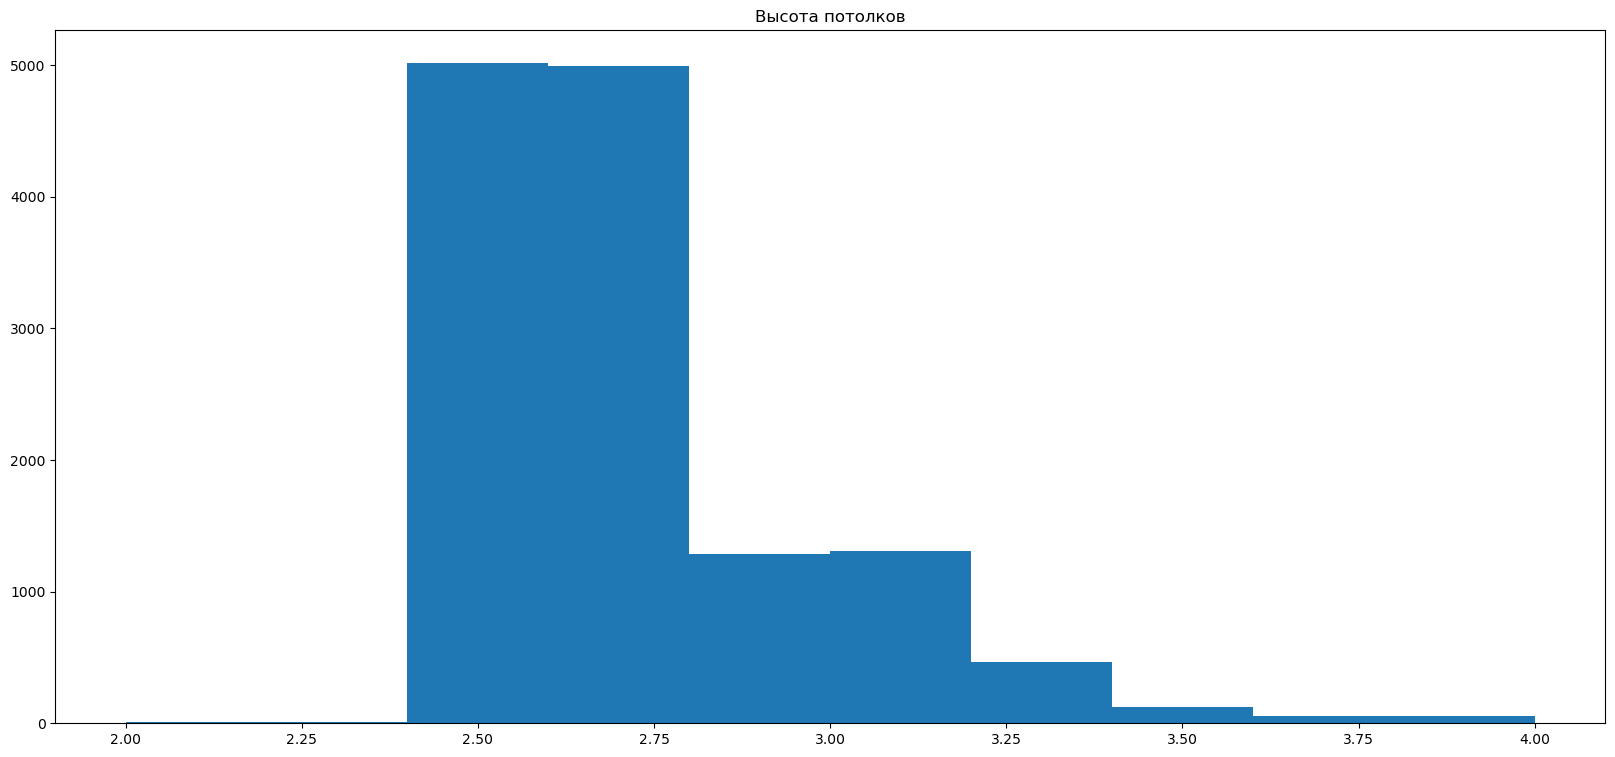

In [149]:
#data.hist(column='ceiling_height')
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['ceiling_height'])
ax.set_title('Высота потолков')
plt.show()

**Большинство квартир имеют полоток высотой около 2,5 метров, что является общепринятым значением.**

Далее изучим этажи квартир

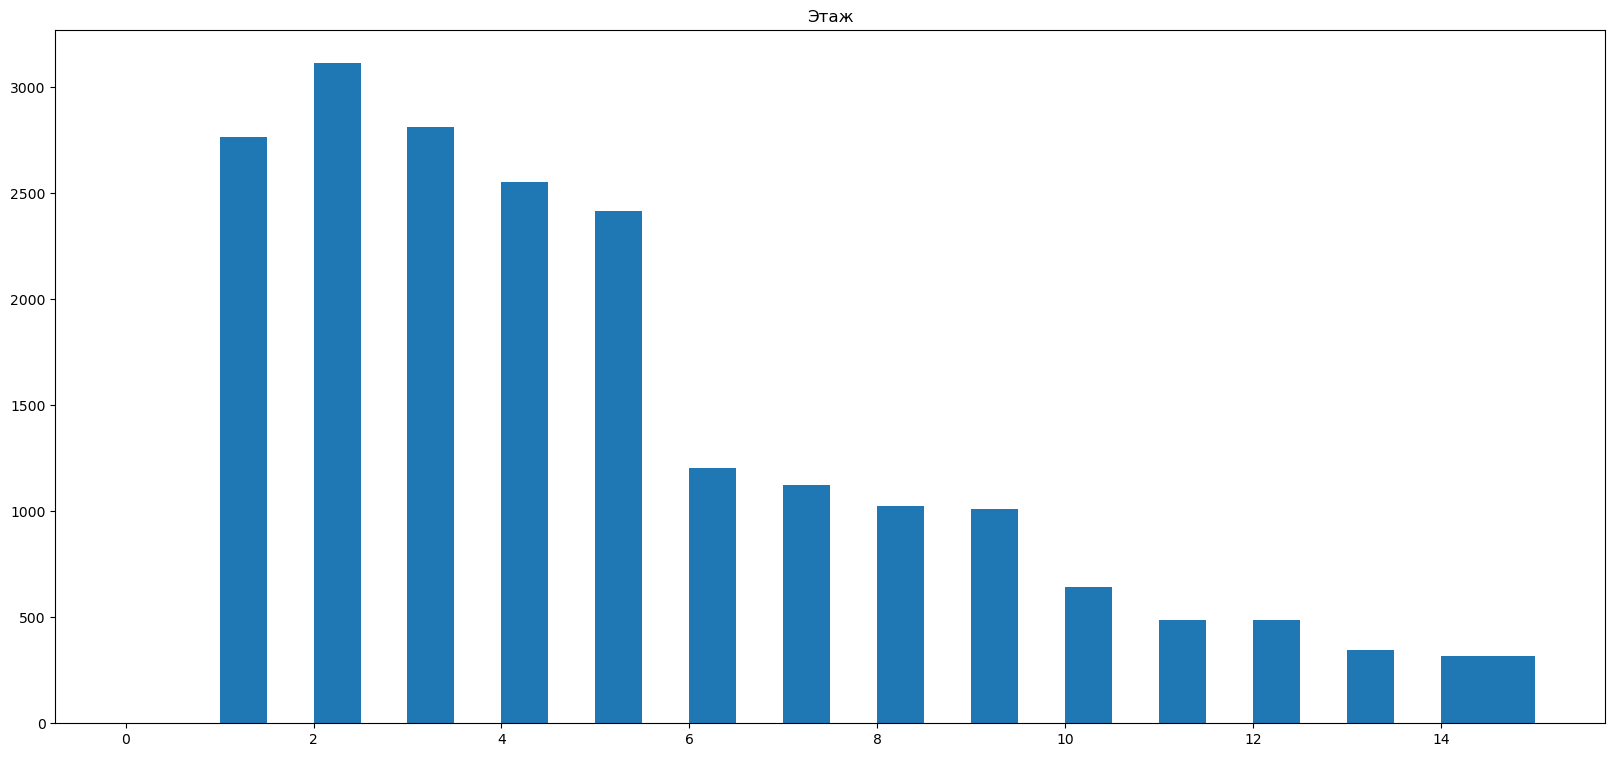

In [150]:
#data.hist(column='floor')
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['floor'], bins=30, range=(0, 15))
ax.set_title('Этаж')
plt.show()

**Большинство квартир находятся на 2 этаже. Далее чем выше этаж, тем реже такую квартиру можно встретить**

За этажами рассмотрим и добавленный недавно тип этажа

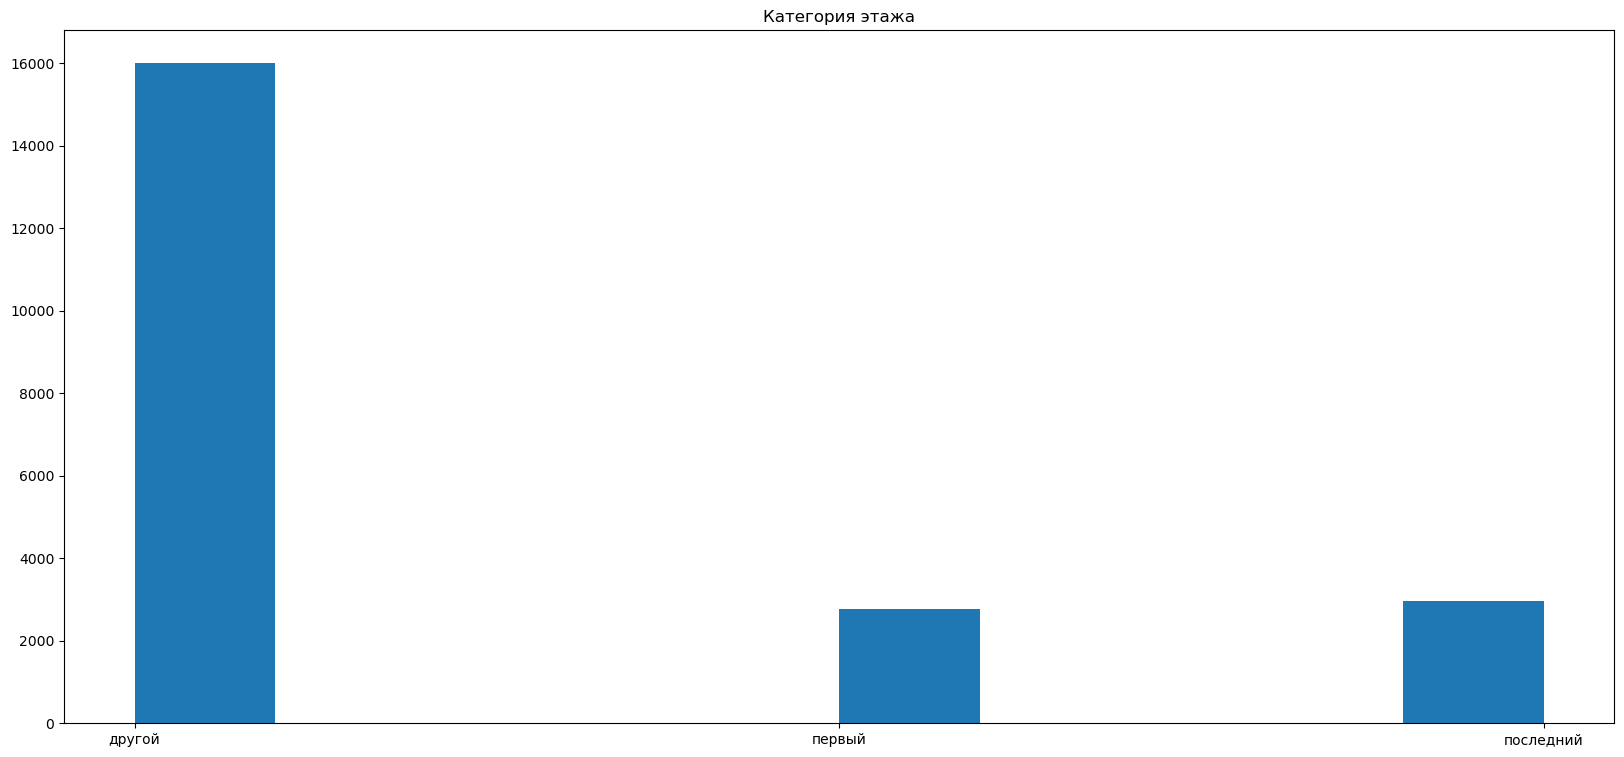

In [151]:
#data['floor_category'].hist()
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['floor_category'])
ax.set_title('Категория этажа')
plt.show()

**Как ни странно большинство квартир находятся на этажах кроме первого и последнего. Квартир на последнем этаже чуть больше, чем квартир на первом.**

Теперь посмотрим на общее количество этажей в домах

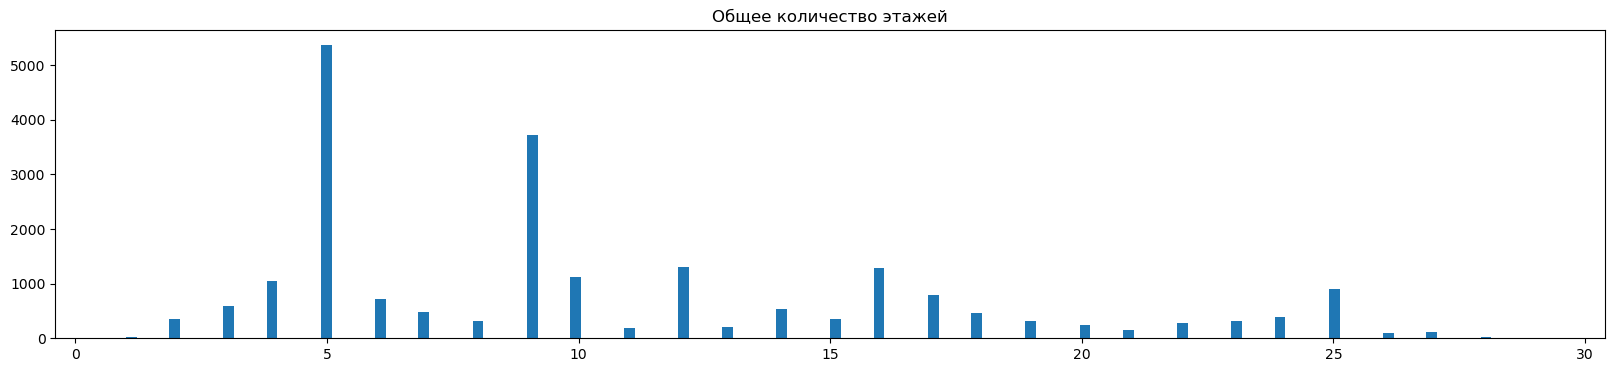

In [153]:
fig, ax = plt.subplots(figsize=(20,4))
ax.hist(x=data['floors_total'], bins=130)
ax.set_title('Общее количество этажей')
plt.show()

**Больше всего 5тиэтажек!**

Изучим расстояние до центра города

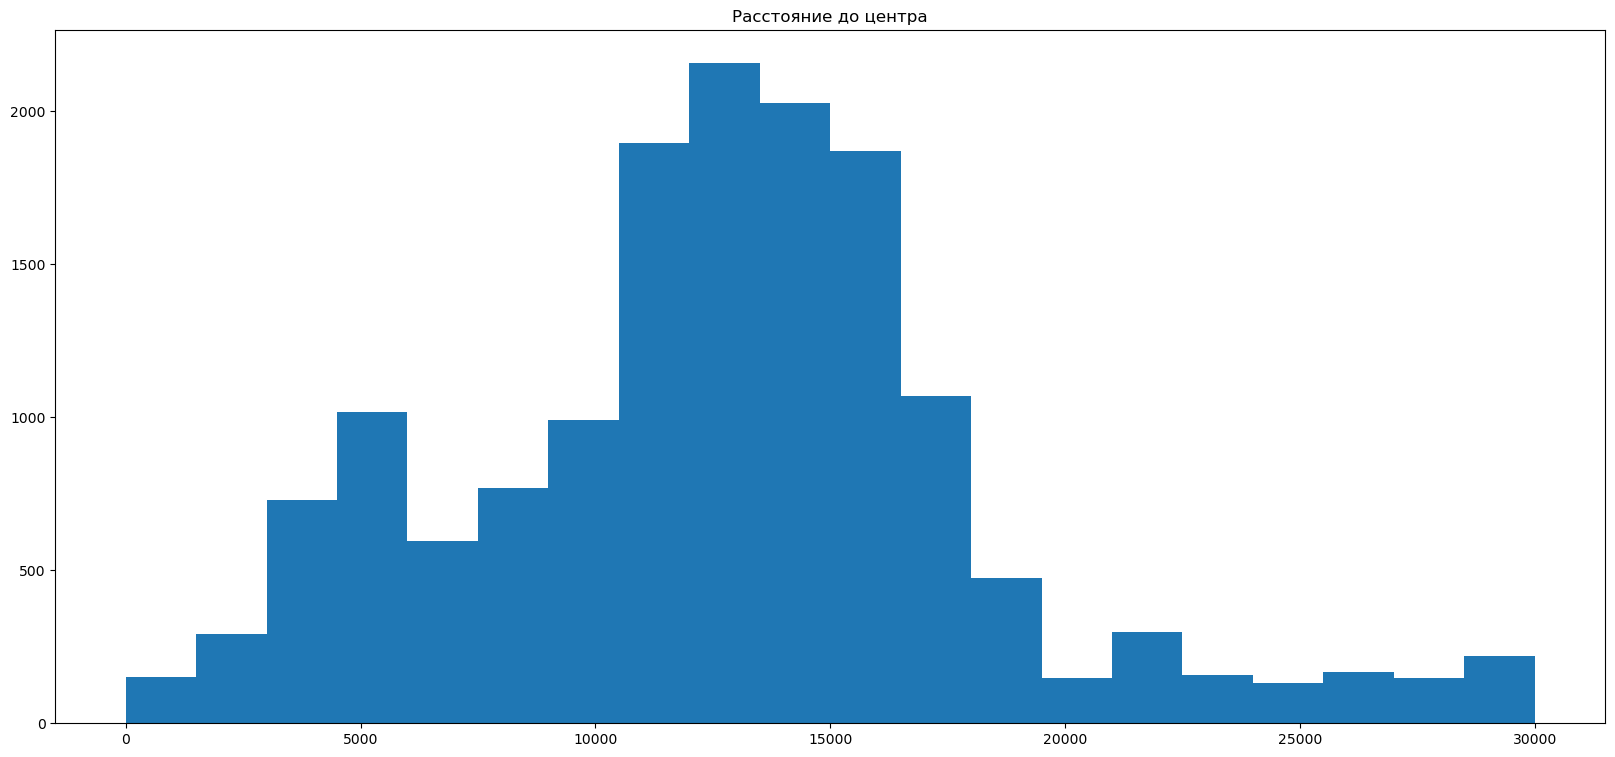

In [154]:
#data.hist(column='cityCenters_nearest')
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['cityCenters_nearest'], bins=20, range=(0, 30000))
ax.set_title('Расстояние до центра')
plt.show()

**Большинство квартир находятся в 13км от центра.**

Теперь расстояние до аэропорта

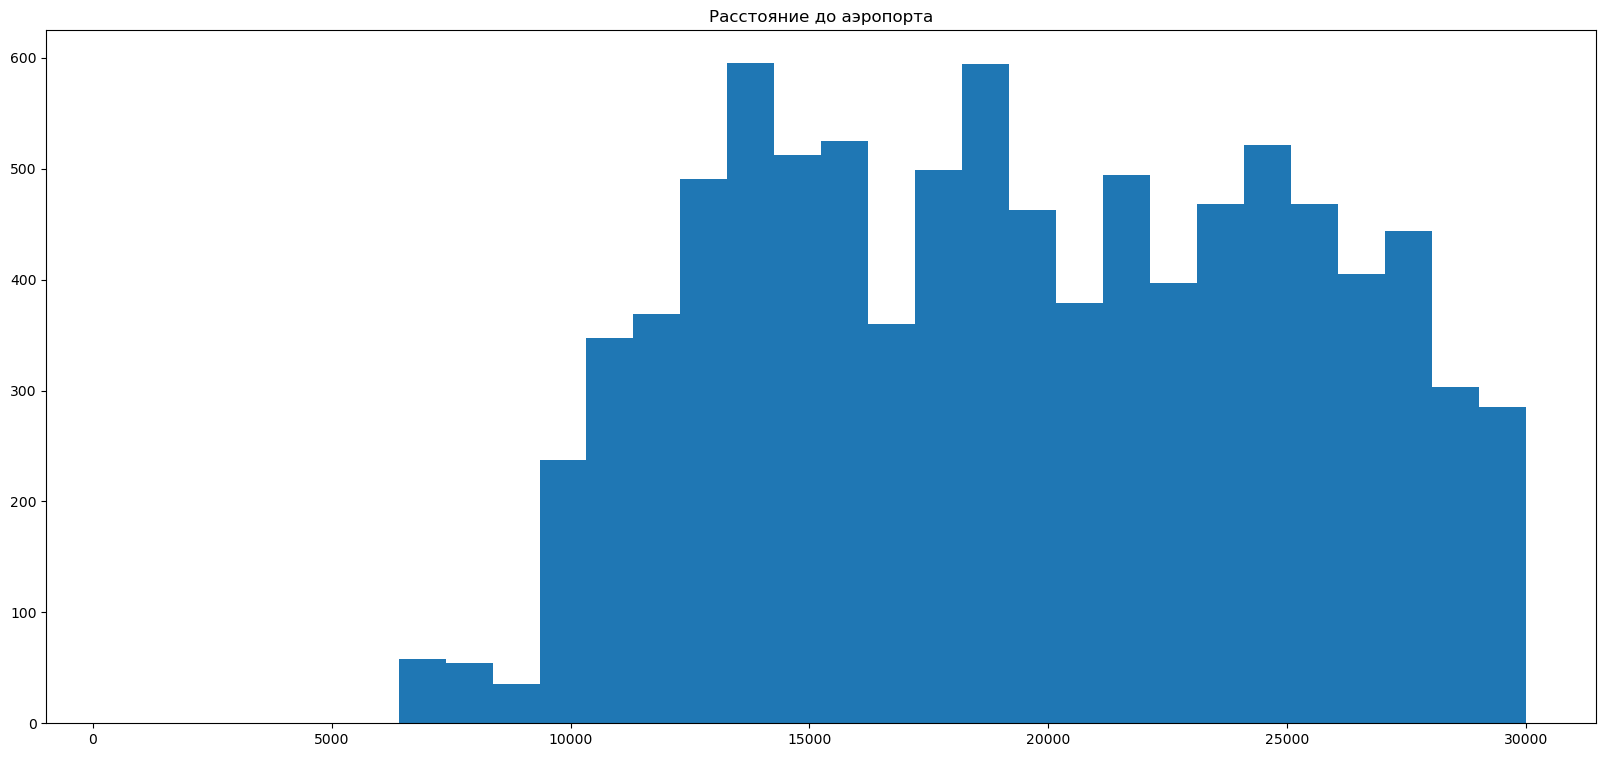

In [155]:
#data.hist(column='airports_nearest')
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['airports_nearest'], bins=30, range=(500, 30000))
ax.set_title('Расстояние до аэропорта')
plt.show()

**Большая часть квартир находится в 17км от аэропорта**

Далее расстояние до парка

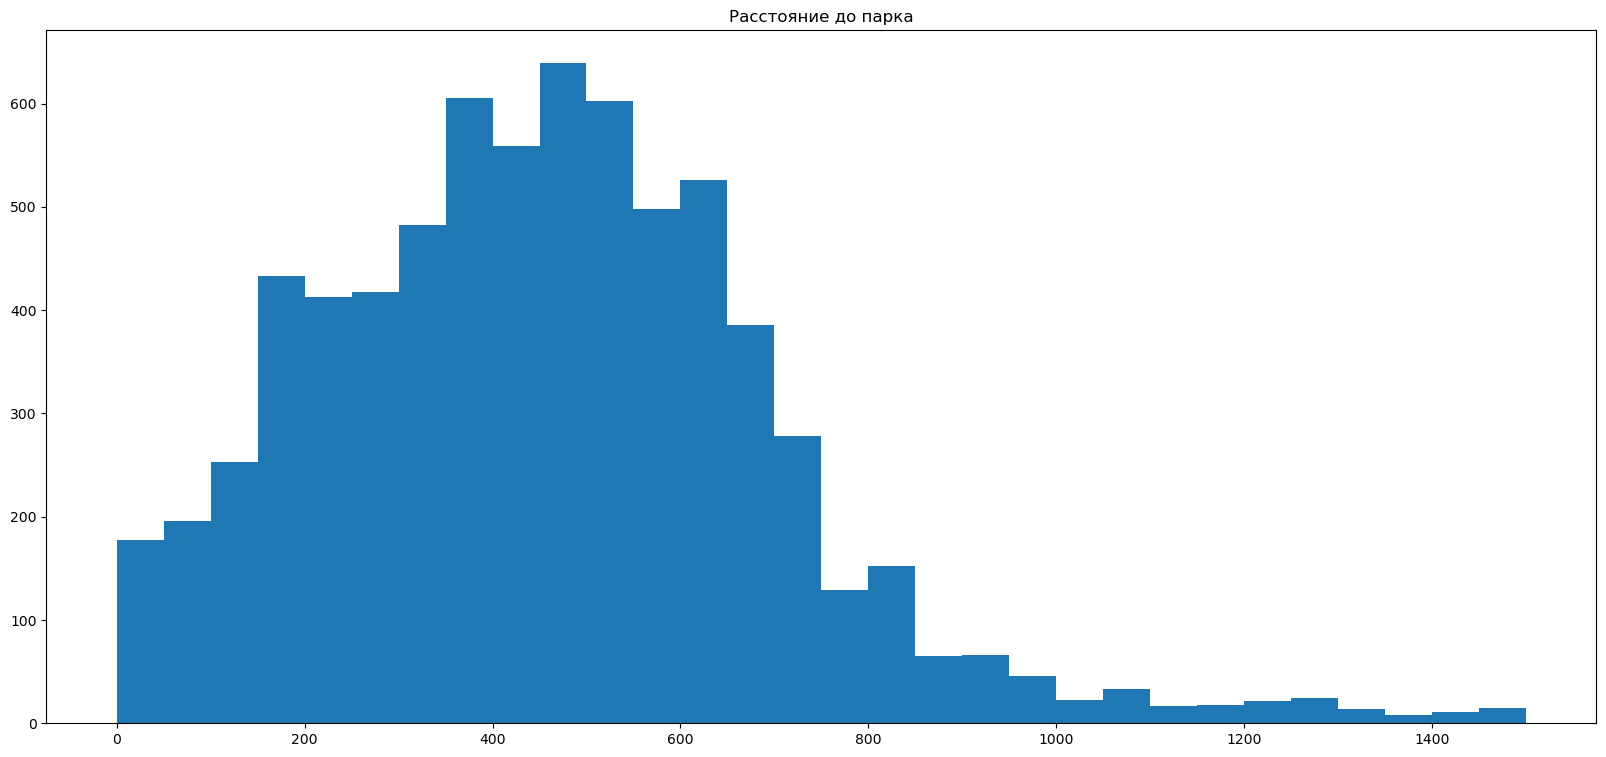

In [156]:
#data.hist(column='parks_nearest')
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['parks_nearest'], bins=30, range=(0,1500))
ax.set_title('Расстояние до парка')
plt.show()

**Большинство квартир находятся меньше чем в 500 метрах от парка.**

Рассмотрим в какой день недели чаще всего публиковались объявления

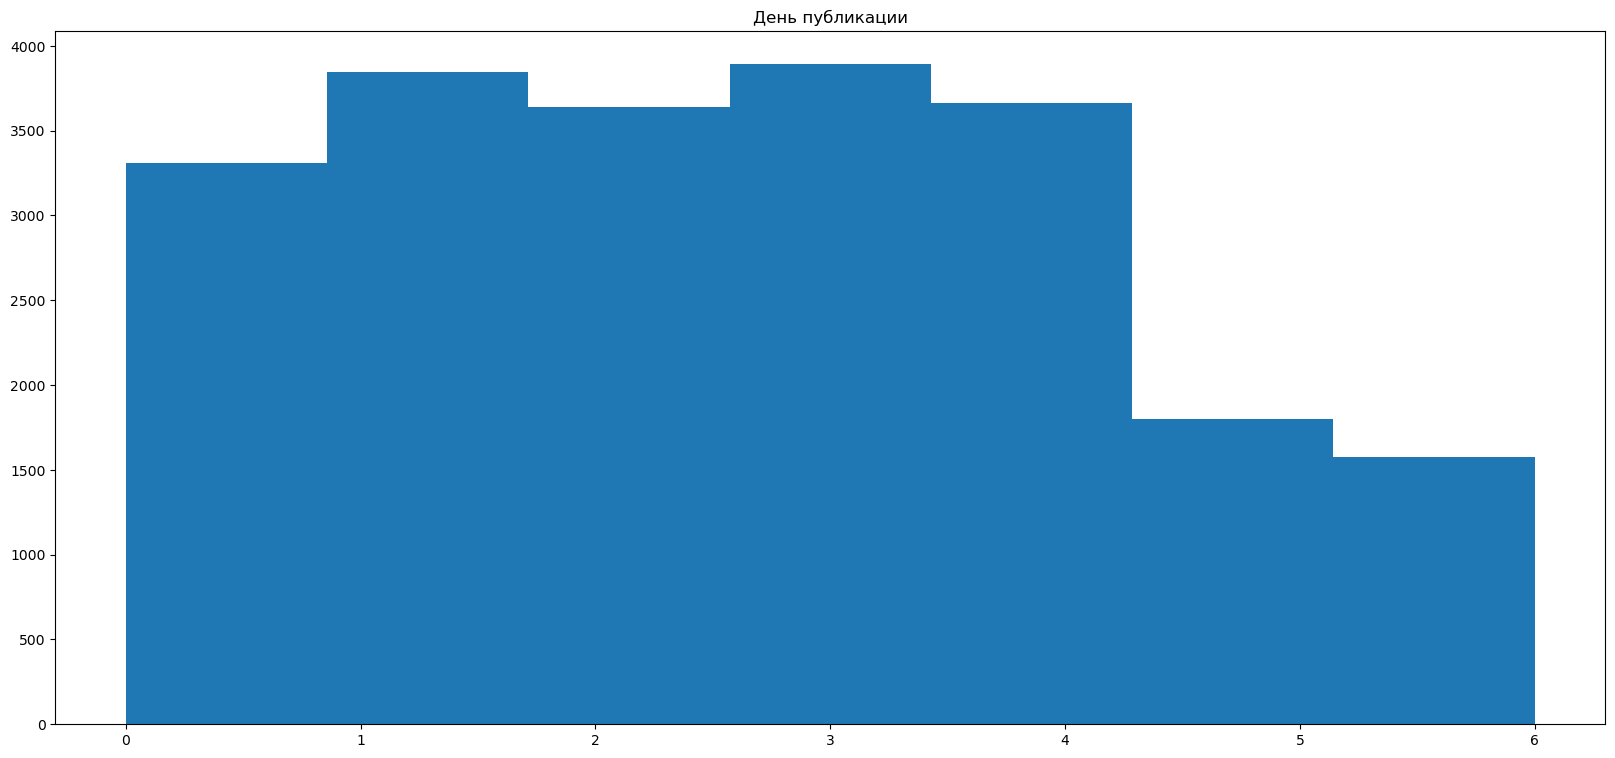

In [157]:
#data.hist(column='day_publication')
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['day_publication'], bins=7)
ax.set_title('День публикации')
plt.show()

**Большинство объявлений было опубликовано в будние дни**

Рассмотрим месяц публикации

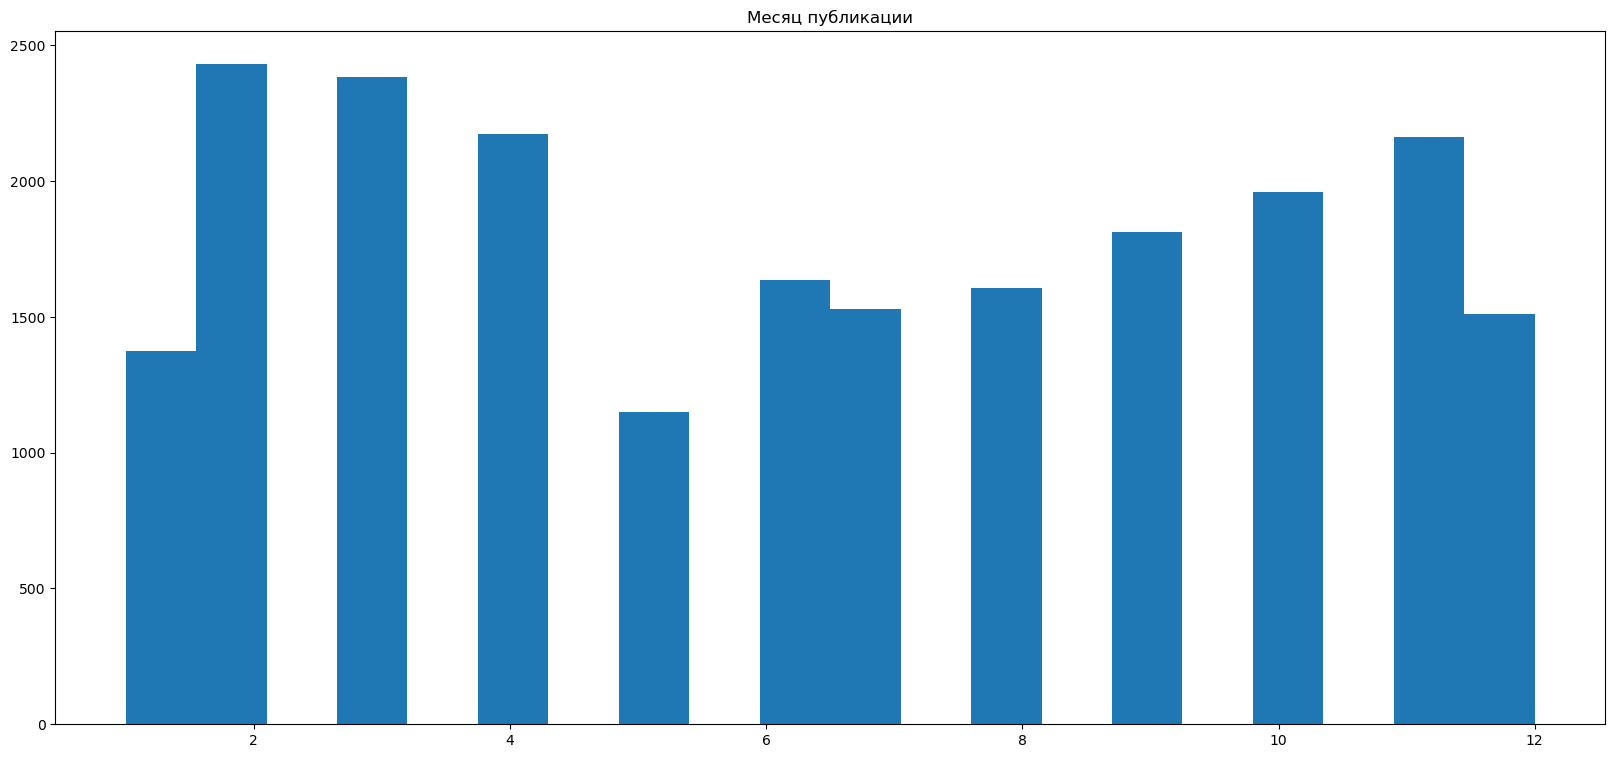

In [158]:
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['month_publication'], bins=20)
ax.set_title('Месяц публикации')
plt.show()

In [159]:
mon = data.loc[data['month_publication'] == 2]
mon.pivot_table(index=mon['year_publication'], values=['last_price'],aggfunc=len)

,last_price
year_publication,
2015,54
2016,235
2017,401
2018,1231
2019,509


**Большой выброс объявлений в феврале 2018 года.**

В феврале 2018 года осуществилось много продаж квартир благодаря рекордному удешевлению ипотеки и снижению стоимости «вторички». Увеличение доступности жилья позволило реализоваться отложенному спросу, копившемуся последние три года.

**Чаще всего объявления публикуются в первой половине года.**

**Узнаем, как быстро продаются квартиры**

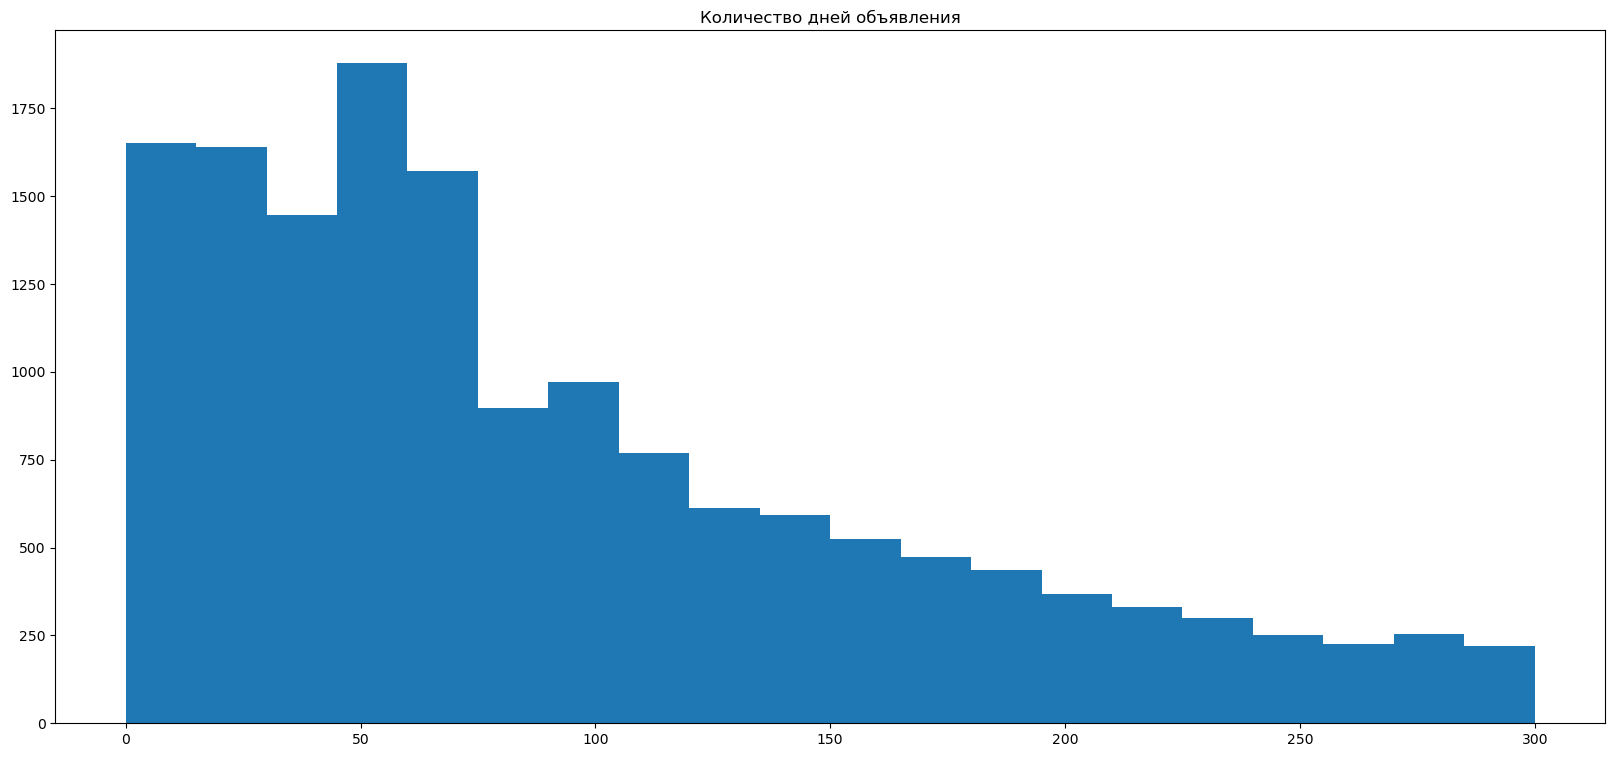

In [160]:
#data.hist(column='days_exposition')
fig, ax = plt.subplots(figsize=(20,9))
ax.hist(x=data['days_exposition'], bins=20, range=(0, 300))
ax.set_title('Количество дней объявления')
plt.show()

**Большинство квартир продаются около 50 дней**

Для точности рассчитаем среднее и медиану

In [161]:
print('Квартиры в среднем продаются:', data['days_exposition'].mean())
print('Медианное значение периода продажи:', data['days_exposition'].median())

Квартиры в среднем продаются: 176.8024763214985
Медианное значение периода продажи: 93.0


In [162]:
data['days_exposition'].describe()

count   18,899.00
mean       176.80
std        214.96
min          3.00
25%         44.00
50%         93.00
75%        225.00
max      1,580.00
Name: days_exposition, dtype: float64

**Среднее в два раза больше медианного... На среднее значение повлияли квартиры, которые долго не могли продать. Можно сказать, что прожада квартиры менее, чем за 50 дней является быстрой, а всё что продавалось больше 200 - долгими.**

In [163]:
data['days_exposition'].mode()

0   45.00
Name: days_exposition, dtype: float64

Чаще всего квартиры продают за 45 дней.

### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Проверим, зависит ли цена от общей площади

In [164]:
print('Корреляция составила:', data['total_area'].corr(data['last_price']))

Корреляция составила: 0.703766040183979


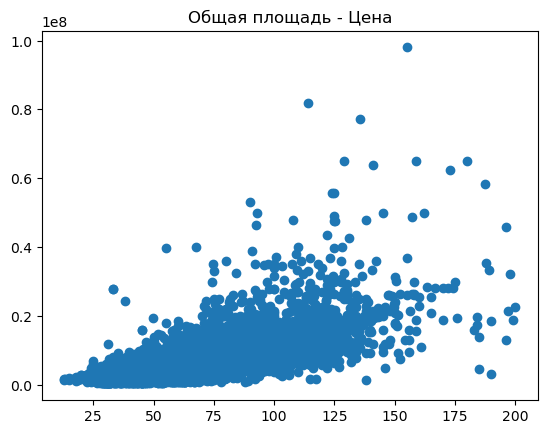

In [165]:
#price_area = data.pivot_table(index=data.index, values=['last_price', 'total_area'])
#pd.plotting.scatter_matrix(price_area);

fig, ax = plt.subplots()
ax.scatter(x=data['total_area'], y=data['last_price'])
ax.set_title('Общая площадь - Цена')   

plt.show()

**Зависимость безусловно есть! Чем больше площадь, тем выше цена**

Далее узнаем, зависит ли цена квартиры от жилой площади

In [166]:
print('Корреляция составила:', data['last_price'].corr(data['living_area']))

Корреляция составила: 0.40781925363858396


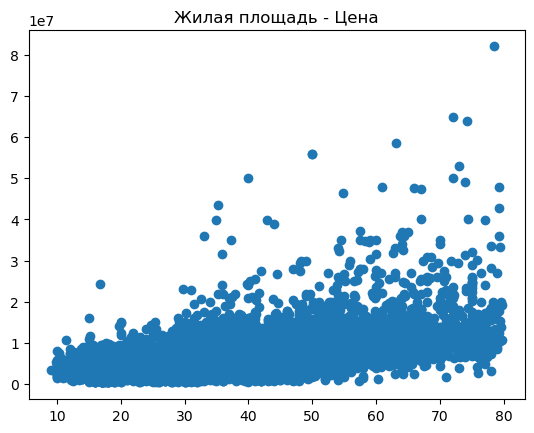

In [167]:
price_living = data.pivot_table(index=data.index, values=['last_price', 'living_area'])
#pd.plotting.scatter_matrix(price_living)
price_living = price_living.loc[price_living['living_area'] != 0]
fig, ax = plt.subplots()
ax.scatter(x=price_living['living_area'], y=price_living['last_price'])
ax.set_title('Жилая площадь - Цена')   

plt.show()

**Зависимость есть! Чем больше жилая площадь, тем больше цена. Корреляция здесь чуть ниже, чем между ценой и общей площадью, так как жилая площадь - это всего лишь какая-то часть общей**

Теперь проверим, зависит ли цена от кухонной площади

In [168]:
data['last_price'].corr(data['kitchen_area'])

0.5150778266144403

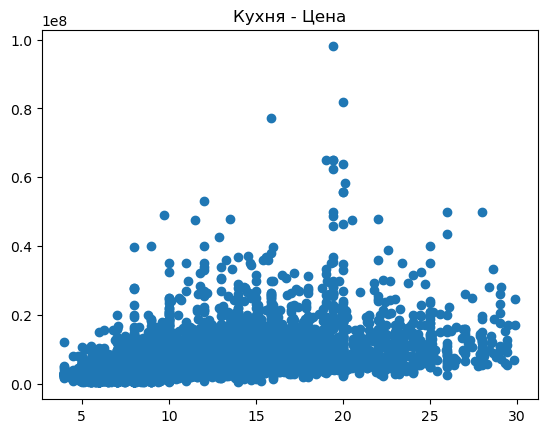

In [169]:
#price_kitchen = data.pivot_table(index=data.index, values=['last_price', 'kitchen_area'])
#pd.plotting.scatter_matrix(price_kitchen)

fig, ax = plt.subplots()
ax.scatter(x=data['kitchen_area'], y=data['last_price'])
ax.set_title('Кухня - Цена')   

plt.show()

**Зависимости здесь тоже небольшая. Цена больше зависит от общей площади, а площадь кухни в большой квартире может иметь и небольшую долю**

In [170]:
data['last_price'].corr(data['rooms'])

0.38982519200775617

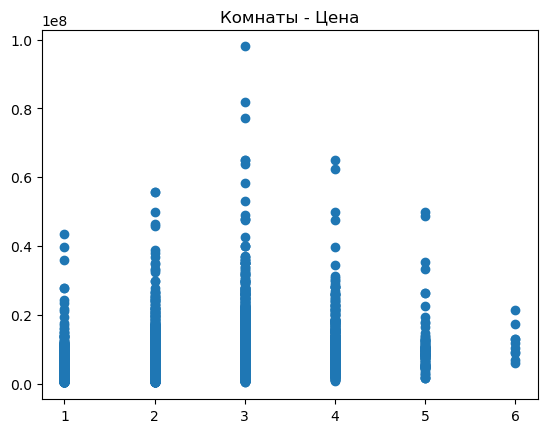

In [171]:
#price_rooms = data.pivot_table(index=data.index, values=['last_price', 'rooms'])
#pd.plotting.scatter_matrix(price_rooms)

fig, ax = plt.subplots()
ax.scatter(x=data['rooms'], y=data['last_price'])
ax.set_title('Комнаты - Цена')   

plt.show()

**Зависимости между количеством комнат и ценой квартиры нет.**

Проверим, зависит ли цена от типа этажа

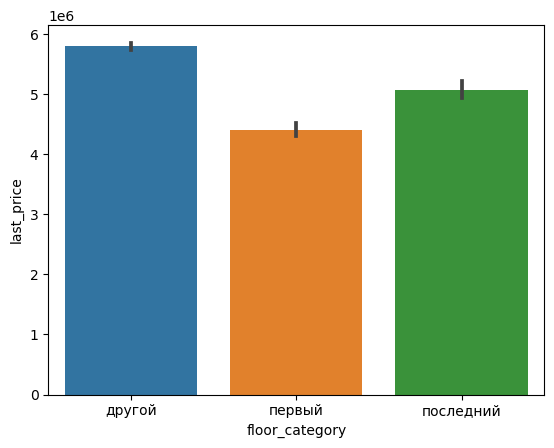

In [173]:
import seaborn
seaborn.barplot(data=data, x='floor_category', y='last_price');

**Так как количество квартир на "других этажах" больше, чем на первых или последних, поэтому на графике цена у них выше. Из этого графика можно сделать вывод, что стоимость квартир на первых этажах чуть меньше, чем на остальныХ.**

Проверим зависит ли цена от даты публикации

Сначала определим, влияет ли на цену день недели публикации

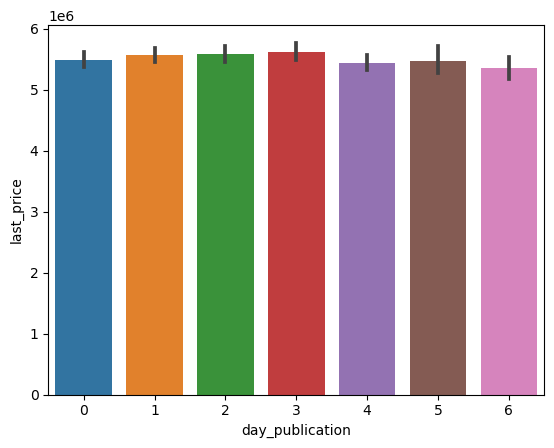

In [174]:
seaborn.barplot(data=data, x='day_publication', y='last_price');

**Квартиры, опубликованные в воскресенье чуть дешевле остальных. Здесь зависимости практически нет.**

Тоже самое проделаем с месяцем публикации

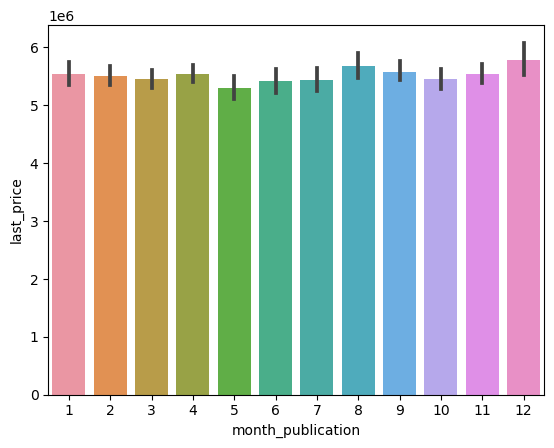

In [175]:
seaborn.barplot(data=data, x='month_publication', y='last_price');

**Чуть дороже остальных квартиры, опубликованные в августе и декабре. В остальном зависимости нет.**

Осталось проверить год публикации

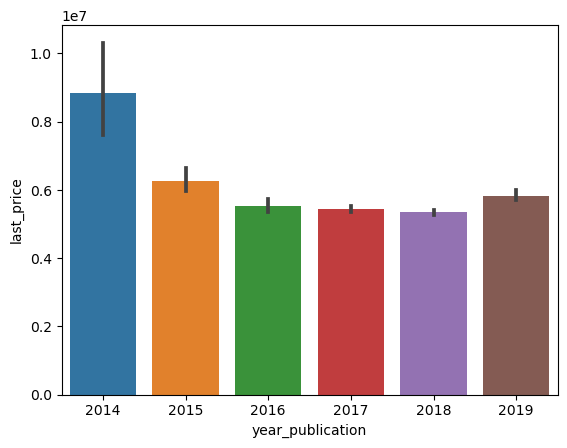

In [176]:
seaborn.barplot(data=data, x='year_publication', y='last_price');

**Самые дорогие квартиры были опубликованы в 2014 году! С 2014 по 2018 год цена квартир падала, а в 2019 немного поднялась.**

Построим сводную таблицу, чтобы посмотреть, как другие параметры менялись с годами.

In [177]:
data.pivot_table(index=data['year_publication'], values=['last_price', 'total_area', 'rooms'], aggfunc={'last_price':'mean', 'total_area':'mean', 'rooms':len})

,last_price,rooms,total_area
year_publication,,,
2014,"8,833,139.42",107,73.80
2015,"6,267,583.37",1029,61.30
2016,"5,538,044.14",2520,56.66
2017,"5,441,948.12",7510,56.03
2018,"5,345,778.25",7901,54.82
2019,"5,828,164.45",2658,54.93


**В 2014 году объявлений намного меньше, чем в остальное время, но средняя стоимость и общая площадь больше! Возможно, в 2014 году продавались квартиры с большой площадью, отчего и цена у них больше, но сравнивать этот год с остальными не корректно.**

По данной таблице сравнить можно 2017 и 2018 год. Не смотря на чуть большее количество объявлений в 2018 году, средняя стоимость в 2017 была больше, но и средняя площадь квартир в 2017 была больше.

In [178]:
(data.loc[data['year_publication'] == 2014]).pivot_table(index=data['month_publication'], values='last_price')

,last_price
month_publication,
11,"12,130,033.86"
12,"8,336,832.73"


Данные за 2014 год неполные (ноябрь и декабрь), поэтому за него так мало объявлений.

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 

In [179]:
n = data.pivot_table(index=['locality_name'], values=['rooms', 'cost_of_one'], 
                     aggfunc={'rooms': len, 'cost_of_one': 'mean'}).sort_values(by='rooms').tail(10)
n

,cost_of_one,rooms
locality_name,,
Выборг,"58,098.45",208
деревня Кудрово,"92,327.52",262
Гатчина,"68,784.70",272
посёлок Парголово,"90,123.24",283
Колпино,"75,322.76",333
Пушкин,"102,507.99",347
Всеволожск,"68,503.73",375
посёлок Шушары,"78,433.34",418
посёлок Мурино,"84,810.62",468


C:\Users\klimatutti\AppData\Local\Temp\ipykernel_5804\1506098688.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  b.set_xticklabels(b.get_xticklabels())


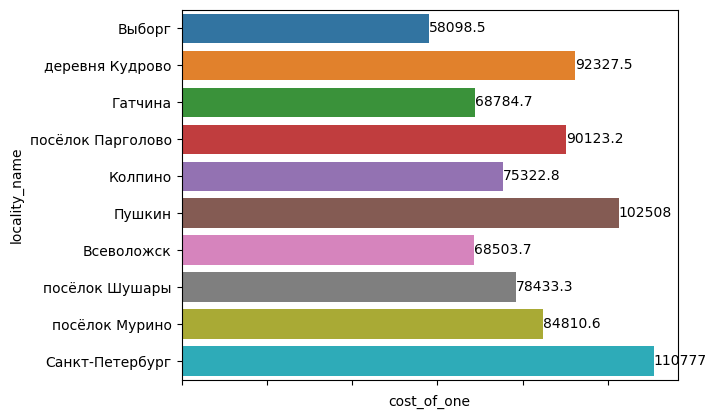

In [183]:
b = seaborn.barplot(data=n, x='cost_of_one', y=n.index);
b.set_xticklabels(b.get_xticklabels())
for i in b.containers:
    b.bar_label(i,)

Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [184]:
max_cost = n.loc[(n['cost_of_one']) == (max(n['cost_of_one']))]
name_max_cost = max_cost.index
print('Населённый пункт с самой высокой стоимостью квадратного метра:', name_max_cost)

Населённый пункт с самой высокой стоимостью квадратного метра: Index(['Санкт-Петербург'], dtype='object', name='locality_name')


In [185]:
min_cost = n.loc[(n['cost_of_one']) == (min(n['cost_of_one']))]
name_min_cost = min_cost.index
print('Населённый пункт с самой низкой стоимостью квадратного метра:', name_min_cost)

Населённый пункт с самой низкой стоимостью квадратного метра: Index(['Выборг'], dtype='object', name='locality_name')


**Из наибольшего количества объявлений в Санкт-Петербурге самая высокая цена за квадратный метр, а в Выборге - самая низкая.**

Теперь выделим квартиры в Санкт-Петербурге с помощью столбца и вычислим среднюю цену каждого километра. 

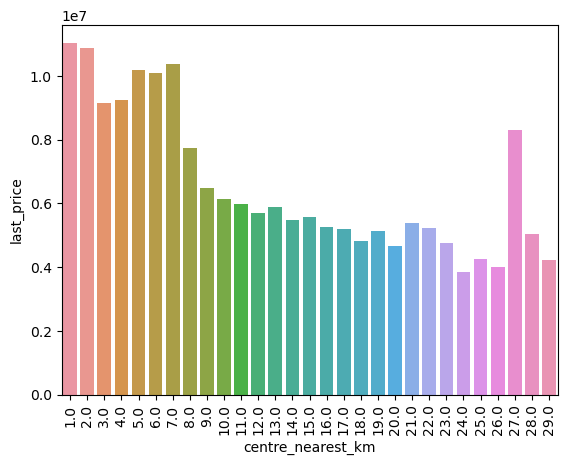

In [187]:
spb = (data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['centre_nearest_km'] != 0)]).pivot_table(index=data['centre_nearest_km'], values=['last_price'], aggfunc='mean')
p = seaborn.barplot(data=spb, x=spb.index, y='last_price');
p.set_xticklabels(p.get_xticklabels(),rotation = 90);

Самые дорогие квартиры ближе к центру, как ни странно.

Посмотрим на выброс на 27 километре

In [188]:
data.loc[(data['centre_nearest_km'] == 27) & (data['locality_name'] == 'Санкт-Петербург')]
#spb_27.pivot_table(index='living_area', values=['last_price', 'cityCenters_nearest', 'rooms'], aggfunc={'last_price':'median', 'cityCenters_nearest':'median', 'rooms':len})

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,categorize_total_area,cost_of_one,day_publication,month_publication,year_publication,floor_category,centre_nearest_km
748,13,"14,350,000.00",74.00,2017-11-28,2,3.13,5,30.00,3,False,...,0,NaN,128.00,средняя,"193,918.92",1,11,2017,другой,27.00
5961,6,"2,250,000.00",32.00,2018-02-27,1,NaN,2,16.50,2,False,...,0,NaN,178.00,маленькая,"70,312.50",1,2,2018,последний,27.00


На 27 километре всего две квартиры и одна из них стоит 14 миллионов, поэтому произошел такой выброс.

### Вывод

4550000 - Медианное значение стоимости квартир

**При анализе данных было определено, что больше всего на цену квартиры влияет её общая площадь, тип этажа и год публикации.**

Выяснено, что цена квартиры зависит от общей площади, так как коэффициент корреляции между данными показателями равен ``0.6337834866766481``

Следующий влиятельный показатель - категория этажа.

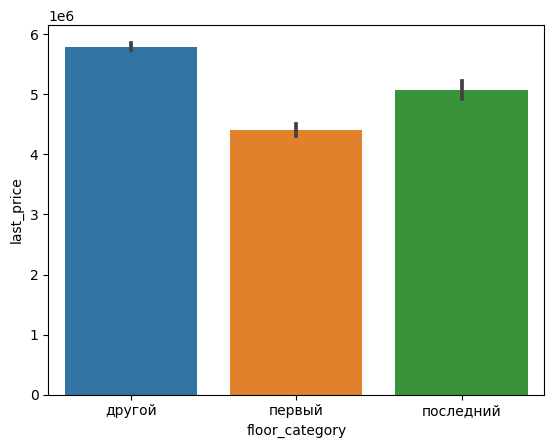

Самые дешёвые квартиры находятся на первом этаже.

Год публикации объявления тоже может многое рассказать о цене квартиры.

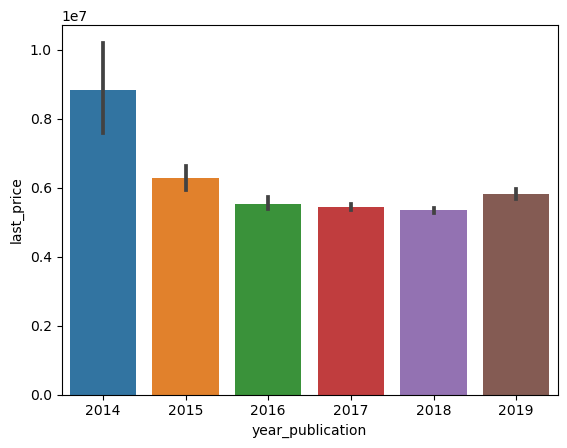

По графику кажется, что самые дорогие квартиры были опубликованы в 2014 году, но проведя исследование, мы обнаружили, что данные за 2014 и 2019 года являются не полными (в них информация только о последних двух месяцах). 

**В феврале 2018 года было зафиксировано рекордное количество объявлений в связи с уменьшением цены на ипотеку в этот период**

**88% квартир имеют площадь от 20 до 80 квадратных метров**

**Продаваемые квартиры имеют в среднем 2 комнаты**

**63% квартир расположены от 1 до 5 этажа**

**Всего 1% квартир находятся меньше чем в 2 км от центра**

**32% квартир находятся меньше чем в 2 км от парка**

**45% квартир продаются раньше чем через 100 дней после публикации**

Были выбраны населённые пункты с наибольшим количетсвом объявлений и для каждого посчитана средняя цена 1 квадратного метра.

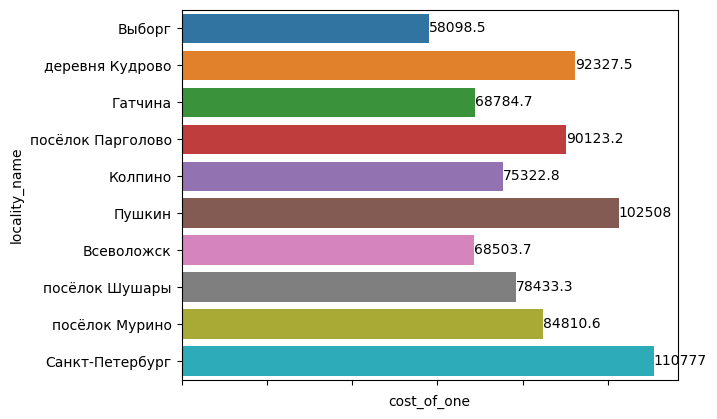

Из выбранных объявлений в Санкт-Петербурге самая высокая цена за квадратный метр, а в Выборге - самая низкая.